# 2022-23 Premier League Predictions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

The newest season of the English Premier League starts soon, and I wanted to use my data analysis skills to predict the final standings.

### Background

Each season, there are 20 Premier League teams that play every other team twice, once at their home stadium and once away at the other team's stadium. Since they can't play themselves, each team plays 19 home matches and 19 away matches, for a total of 38 matches per season. In all, since each match is composed of two teams, there are 380 total Premier League matches per season.

Each match can result in three options: a win, a loss, or a draw. Instead of using win percentage, soccer leagues tend to use a point system to rank all the teams:
- When a team wins a match, they get 3 points and the losing team gets 0.
- When the match ends in a draw, each team gets 1 point.

The team with the most points at the end of the season is crowned the champion. Unlike American sports leagues, there are no playoffs for this league. If two teams are tied on points, the tiebreaker is goal difference (total number of goals scored minus total number of goals conceded). The three teams with the least amount of points get relegated to the immediate lower division (EFL Championship), and the top three teams from that league get promoted to play in the next Premier League season.

Usually, each season runs from August to May of the next year. For example, the 2021-22 Premier League season started on August 13, 2021 and ended on May 22, 2022. Recently, a few seasons are exceptions to that scheduling format, mainly because of the COVID-19 pandemic.

- The 2019-20 season started on August 9, 2019, paused on March 13, 2020, restarted on June 17, and ended on July 26.
- The 2020-21 season started on September 12, 2020 and ended on May 23, 2021.

### Data Analysis

Most of the work done is preparing the data, which are match results from FBREF (fbref.com). Once I have all the matches I want, I use an improvised, simpler version of an already simplified version of the Poisson distribution to predict all the matches for the 2022-23 Premier League season.

For more information on how soccer analysts use the Poisson distribution to predict matches, I can't say I'm an expert on that matter, but there are plenty of resources available that explain this methodology.

- https://www.sbo.net/strategy/football-prediction-model-poisson-distribution/
- https://www.pinnacle.com/en/betting-articles/Soccer/how-to-calculate-poisson-distribution/MD62MLXUMKMXZ6A8
- https://www.youtube.com/watch?v=ZZW2b84T0cw

## Preparing the Data

### Managers

I want to be selective about the matches I choose to use for my predictions. For the majority of teams, I'm only going to look at matches where the current manager of both teams was the manager of their respective teams for that game. There are a few exceptions, which I'll explain later. For the managers, I simply look them up on Wikipedia.

In [2]:
managers = pd.read_html("https://en.wikipedia.org/wiki/2022%E2%80%9323_Premier_League")

In [3]:
df_mgr_1 = managers[2]
df_mgr_1

,Team,Manager,Captain,Kit manufacturer,Shirt sponsor (chest),Shirt sponsor (sleeve)
0,Arsenal,Mikel Arteta,Martin Ødegaard,Adidas[6],Emirates[7],Visit Rwanda[8]
1,Aston Villa,Steven Gerrard,John McGinn,Castore[9],Cazoo[10],TBA
2,Bournemouth,Scott Parker,Lloyd Kelly,Umbro,Dafabet[11],DeWalt[12]
3,Brentford,Thomas Frank,Pontus Jansson,Umbro,Hollywoodbets[13],Safetyculture
4,Brighton & Hove Albion,Graham Potter,Lewis Dunk,Nike[14],American Express[14],SnickersUK.com[15]
5,Chelsea,Thomas Tuchel,César Azpilicueta,Nike,Three[16],WhaleFin[17]
6,Crystal Palace,Patrick Vieira,TBA,Macron[18],Cinch[19],Mukuru[20]
7,Everton,Frank Lampard,Séamus Coleman,Hummel[21],Stake.com[22],BOXT[23]
8,Fulham,Marco Silva,Tom Cairney,Adidas[24],W88,World Mobile[25]
9,Leeds United,Jesse Marsch,Liam Cooper,Adidas[26],SBOTOP[27],Wish[28]


These are the current Premier League managers, but I need the dates when they started at their respective clubs.

In [4]:
managers = pd.read_html("https://en.wikipedia.org/wiki/List_of_current_Premier_League_and_English_Football_League_managers")

In [5]:
df_mgr_2 = managers[0]
df_mgr_2.head()

,Manager,Nationality,Date of birth,Club,Division,From,Time as manager,Ref(s)
0,Simon Weaver,England,20 December 1977,Harrogate Town,NaN,21 May 2009,"13 years, 74 days",[12]
1,Gareth Ainsworth,England,10 May 1973,Wycombe Wanderers,NaN,24 September 2012[N 2],"9 years, 313 days",[A 1]
2,John Coleman,England,12 October 1962,Accrington Stanley,NaN,18 September 2014,"7 years, 319 days",[15]
3,Jürgen Klopp,Germany,16 June 1967,Liverpool,NaN,8 October 2015,"6 years, 299 days",[16]
4,Pep Guardiola,Spain,18 January 1971,Manchester City,NaN,1 July 2016,"6 years, 33 days",[17]


This is a list of all Premier League and English Football League managers, which includes their starting dates. Now we'll just merge the list of Premier League managers to this list of all English football managers.

In [6]:
df_mgr_3 = pd.merge(df_mgr_1, df_mgr_2, on = 'Manager')
df_mgr_3.tail()

,Team,Manager,Captain,Kit manufacturer,Shirt sponsor (chest),Shirt sponsor (sleeve),Nationality,Date of birth,Club,Division,From,Time as manager,Ref(s)
15,Nottingham Forest,Steve Cooper,Joe Worrall,Macron,TBA,TBA,Wales,10 December 1979,Nottingham Forest,NaN,21 September 2021,316 days,[58]
16,Southampton,Ralph Hasenhüttl,James Ward-Prowse,Hummel[44],Sportsbet.io[45],Virgin Media[46],Austria,9 August 1967,Southampton,NaN,6 December 2018,"3 years, 240 days",[24]
17,Tottenham Hotspur,Antonio Conte,Hugo Lloris,Nike[47],AIA[48],Cinch[49],Italy,31 July 1969,Tottenham Hotspur,NaN,2 November 2021,274 days,[62]
18,West Ham United,David Moyes,Declan Rice,Umbro,Betway,Scope Markets[50],Scotland,25 April 1963,West Ham United,NaN,30 December 2019,"2 years, 216 days",[31]
19,Wolverhampton Wanderers,Bruno Lage,Conor Coady,Castore[51],AstroPay[52],12BET,Portugal,12 May 1976,Wolverhampton Wanderers,NaN,9 June 2021,"1 year, 55 days",[51]


In [7]:
df_mgr_3 = df_mgr_3[['Team', 'Manager', 'From']]
df_mgr_3['Manager_Start'] = pd.to_datetime(df_mgr_3['From'])
df_mgr_3 = df_mgr_3.drop('From', axis=1)
print(df_mgr_3)

                       Team           Manager Manager_Start
0                   Arsenal      Mikel Arteta    2019-12-22
1               Aston Villa    Steven Gerrard    2021-11-11
2               Bournemouth      Scott Parker    2021-06-28
3                 Brentford      Thomas Frank    2018-10-16
4    Brighton & Hove Albion     Graham Potter    2019-05-20
5                   Chelsea     Thomas Tuchel    2021-01-26
6            Crystal Palace    Patrick Vieira    2021-07-04
7                   Everton     Frank Lampard    2022-01-30
8                    Fulham       Marco Silva    2021-07-01
9              Leeds United      Jesse Marsch    2022-02-28
10           Leicester City   Brendan Rodgers    2019-02-26
11                Liverpool      Jürgen Klopp    2015-10-08
12          Manchester City     Pep Guardiola    2016-07-01
13        Manchester United      Erik ten Hag    2022-05-23
14         Newcastle United        Eddie Howe    2021-11-08
15        Nottingham Forest      Steve C

In [8]:
df_mgr_3.dtypes

Team                     object
Manager                  object
Manager_Start    datetime64[ns]
dtype: object

I'm going to save this list since this Wikipedia page can change as new managers come in.

In [9]:
df_mgr_3.to_csv('2022_23_managers.csv', index = False)

### Match Data

FBREF has data Premier League match data by season, so I just downloaded all the appropriate seasons. Looking at the list of managers, the oldest starting date of the current managers was during the 2015-16 season, so we'll download matches from all the seasons since then.

In [10]:
epl_results_2021_22 = pd.read_csv('epl_results_2021_22.csv', 
                                  usecols = [0,1,2,4,6,8])
epl_results_2021_22['Date'] = pd.to_datetime(epl_results_2021_22['Date'])
epl_results_2021_22 = epl_results_2021_22.dropna()
epl_results_2021_22.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal
1,1.0,Sat,2021-08-14,Manchester Utd,5–1,Leeds United
2,1.0,Sat,2021-08-14,Leicester City,1–0,Wolves
3,1.0,Sat,2021-08-14,Burnley,1–2,Brighton
4,1.0,Sat,2021-08-14,Chelsea,3–0,Crystal Palace


In [11]:
epl_results_2021_22.shape

(380, 6)

In [12]:
epl_results_2021_22.isna().any()

Wk       False
Day      False
Date     False
Home     False
Score    False
Away     False
dtype: bool

In [13]:
epl_results_2020_21 = pd.read_csv('epl_results_2020_21.csv', 
                                  usecols = [0,1,2,4,6,8])
epl_results_2020_21['Date'] = pd.to_datetime(epl_results_2020_21['Date'])
epl_results_2020_21 = epl_results_2020_21.dropna()
epl_results_2020_21.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Sat,2020-09-12,Fulham,0–3,Arsenal
1,1.0,Sat,2020-09-12,Crystal Palace,1–0,Southampton
2,1.0,Sat,2020-09-12,Liverpool,4–3,Leeds United
3,1.0,Sat,2020-09-12,West Ham,0–2,Newcastle Utd
4,1.0,Sun,2020-09-13,West Brom,0–3,Leicester City


In [14]:
epl_results_2019_20 = pd.read_csv('epl_results_2019_20.csv', 
                                  usecols = [0,1,2,4,6,8])
epl_results_2019_20['Date'] = pd.to_datetime(epl_results_2019_20['Date'])
epl_results_2019_20 = epl_results_2019_20.dropna()
epl_results_2019_20.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Fri,2019-08-09,Liverpool,4–1,Norwich City
1,1.0,Sat,2019-08-10,West Ham,0–5,Manchester City
2,1.0,Sat,2019-08-10,Burnley,3–0,Southampton
3,1.0,Sat,2019-08-10,Watford,0–3,Brighton
4,1.0,Sat,2019-08-10,Crystal Palace,0–0,Everton


In [15]:
epl_results_2018_19 = pd.read_csv('epl_results_2018_19.csv', 
                                  usecols = [0,1,2,4,6,8])
epl_results_2018_19['Date'] = pd.to_datetime(epl_results_2018_19['Date'])
epl_results_2018_19 = epl_results_2018_19.dropna()
epl_results_2018_19.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Fri,2018-08-10,Manchester Utd,2–1,Leicester City
1,1.0,Sat,2018-08-11,Newcastle Utd,1–2,Tottenham
2,1.0,Sat,2018-08-11,Fulham,0–2,Crystal Palace
3,1.0,Sat,2018-08-11,Bournemouth,2–0,Cardiff City
4,1.0,Sat,2018-08-11,Watford,2–0,Brighton


In [16]:
epl_results_2017_18 = pd.read_csv('epl_results_2017_18.csv', 
                                  usecols = [0,1,2,4,6,8])
epl_results_2017_18['Date'] = pd.to_datetime(epl_results_2017_18['Date'])
epl_results_2017_18 = epl_results_2017_18.dropna()
epl_results_2017_18.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Fri,2017-08-11,Arsenal,4–3,Leicester City
1,1.0,Sat,2017-08-12,Watford,3–3,Liverpool
2,1.0,Sat,2017-08-12,Crystal Palace,0–3,Huddersfield
3,1.0,Sat,2017-08-12,West Brom,1–0,Bournemouth
4,1.0,Sat,2017-08-12,Chelsea,2–3,Burnley


No xG seasons

In [17]:
epl_results_2016_17 = pd.read_csv('epl_results_2016_17.csv', 
                                  usecols = [0,1,2,4,5,6])
epl_results_2016_17['Date'] = pd.to_datetime(epl_results_2016_17['Date'])
epl_results_2016_17 = epl_results_2016_17.dropna()
epl_results_2016_17.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Sat,2016-08-13,Hull City,2–1,Leicester City
1,1.0,Sat,2016-08-13,Burnley,0–1,Swansea City
2,1.0,Sat,2016-08-13,Southampton,1–1,Watford
3,1.0,Sat,2016-08-13,Crystal Palace,0–1,West Brom
4,1.0,Sat,2016-08-13,Middlesbrough,1–1,Stoke City


In [18]:
epl_results_2015_16 = pd.read_csv('epl_results_2015_16.csv', 
                                  usecols = [0,1,2,4,5,6])
epl_results_2015_16['Date'] = pd.to_datetime(epl_results_2015_16['Date'])
epl_results_2015_16 = epl_results_2015_16.dropna()
epl_results_2015_16.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Sat,2015-08-08,Manchester Utd,1–0,Tottenham
1,1.0,Sat,2015-08-08,Norwich City,1–3,Crystal Palace
2,1.0,Sat,2015-08-08,Leicester City,4–2,Sunderland
3,1.0,Sat,2015-08-08,Everton,2–2,Watford
4,1.0,Sat,2015-08-08,Bournemouth,0–1,Aston Villa


Now I will just concatenated all the seasons together.

In [19]:
epl_results_2015_22 = pd.concat([epl_results_2021_22,
                                 epl_results_2020_21,
                                 epl_results_2019_20,
                                 epl_results_2018_19,
                                 epl_results_2017_18,
                                 epl_results_2016_17,
                                 epl_results_2015_16
                                ])
epl_results_2015_22.shape

(2660, 6)

There are 380 Premier league matches every season, and I concatenated seven seasons, so the number of rows should match the number of Premier League matches over seven seasons.

In [20]:
380 * 7

2660

In [21]:
epl_results_2015_22.head()

,Wk,Day,Date,Home,Score,Away
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal
1,1.0,Sat,2021-08-14,Manchester Utd,5–1,Leeds United
2,1.0,Sat,2021-08-14,Leicester City,1–0,Wolves
3,1.0,Sat,2021-08-14,Burnley,1–2,Brighton
4,1.0,Sat,2021-08-14,Chelsea,3–0,Crystal Palace


In [22]:
epl_results_2015_22.dtypes

Wk              float64
Day              object
Date     datetime64[ns]
Home             object
Score            object
Away             object
dtype: object

### Managers and Matches

We need to make sure the matches I included only include teams that are currently in the Premier League. Since teams can get promoted and relegated after each season, there will be some teams in the matches dataframe that are not currently in the Premier League.

To do this, I will make a dataframe that includes match results with two conditions:
- Both teams are currently in the Premier League
- Both teams had managers that are currently the manager for the same team 

Again, these conditions can't apply to all teams for different reasons, which I will address later. But for now, we can get past match results for the majority of teams.

In [23]:
teams1 = df_mgr_3.Team.unique()
print(sorted(teams1))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton & Hove Albion', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 'Nottingham Forest', 'Southampton', 'Tottenham Hotspur', 'West Ham United', 'Wolverhampton Wanderers']


In [24]:
teams2 = epl_results_2015_22.Home.unique()
print(sorted(teams2))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Burnley', 'Cardiff City', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Hull City', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Middlesbrough', 'Newcastle Utd', 'Norwich City', 'Sheffield Utd', 'Southampton', 'Stoke City', 'Sunderland', 'Swansea City', 'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Wolves']


One thing I noticed is that some of the team names in the manager dataframe are slightly different than the team names in the matches dataframe, so I need to rename those.

In [25]:
df_mgr_3['Team'] = df_mgr_3['Team'].replace(['Brighton & Hove Albion', 
                                             'Manchester United', 
                                             'Newcastle United', 
                                             'Tottenham Hotspur', 
                                             'West Ham United', 
                                             'Wolverhampton Wanderers'],
                                            ['Brighton',
                                             'Manchester Utd',
                                             'Newcastle Utd',
                                             'Tottenham',
                                             'West Ham',
                                             'Wolves']
                                            )
teams3 = df_mgr_3.Team.unique()
print(sorted(teams3))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', 'Nottingham Forest', 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


Now I can merge the two datarfames together. An inner join will exclude any teams not currently in the Premier League. 

In [26]:
results_managers_home = pd.merge(epl_results_2015_22, df_mgr_3, how = 'inner', left_on = 'Home', right_on = 'Team')
results_managers_home.head()

,Wk,Day,Date,Home,Score,Away,Team,Manager,Manager_Start
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal,Brentford,Thomas Frank,2018-10-16
1,4.0,Sat,2021-09-11,Brentford,0–1,Brighton,Brentford,Thomas Frank,2018-10-16
2,6.0,Sat,2021-09-25,Brentford,3–3,Liverpool,Brentford,Thomas Frank,2018-10-16
3,8.0,Sat,2021-10-16,Brentford,0–1,Chelsea,Brentford,Thomas Frank,2018-10-16
4,9.0,Sun,2021-10-24,Brentford,1–2,Leicester City,Brentford,Thomas Frank,2018-10-16


In [27]:
results_managers_home = results_managers_home.rename(columns = {'Manager':'Home_Manager', 
                                                                'Manager_Start':'Home_Manager_Start'})

Again, I only want to include matches where the current manager was in charge, so I'm going to exclude matches where the match date was after or on the manager's starting date. I need to separate this between home and away managers.

In [28]:
results_managers_home = results_managers_home[(results_managers_home['Date'] >= results_managers_home['Home_Manager_Start'])]

In [29]:
results_managers_home = results_managers_home.drop(['Team'], axis = 1)
results_managers_home.head()

,Wk,Day,Date,Home,Score,Away,Home_Manager,Home_Manager_Start
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal,Thomas Frank,2018-10-16
1,4.0,Sat,2021-09-11,Brentford,0–1,Brighton,Thomas Frank,2018-10-16
2,6.0,Sat,2021-09-25,Brentford,3–3,Liverpool,Thomas Frank,2018-10-16
3,8.0,Sat,2021-10-16,Brentford,0–1,Chelsea,Thomas Frank,2018-10-16
4,9.0,Sun,2021-10-24,Brentford,1–2,Leicester City,Thomas Frank,2018-10-16


Now I will do repeat this for the away managers.

In [30]:
results_managers_away = pd.merge(epl_results_2015_22, df_mgr_3, how = 'inner', left_on = 'Away', right_on = 'Team')
results_managers_away.head()

,Wk,Day,Date,Home,Score,Away,Team,Manager,Manager_Start
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal,Arsenal,Mikel Arteta,2019-12-22
1,3.0,Sat,2021-08-28,Manchester City,5–0,Arsenal,Arsenal,Mikel Arteta,2019-12-22
2,5.0,Sat,2021-09-18,Burnley,0–1,Arsenal,Arsenal,Mikel Arteta,2019-12-22
3,7.0,Sat,2021-10-02,Brighton,0–0,Arsenal,Arsenal,Mikel Arteta,2019-12-22
4,10.0,Sat,2021-10-30,Leicester City,0–2,Arsenal,Arsenal,Mikel Arteta,2019-12-22


In [31]:
results_managers_away = results_managers_away.rename(columns = {'Manager':'Away_Manager', 
                                                                'Manager_Start':'Away_Manager_Start'})

In [32]:
results_managers_away = results_managers_away[(results_managers_away['Date'] >= results_managers_away['Away_Manager_Start'])]

In [33]:
results_managers_away = results_managers_away.drop(['Team'], axis = 1)
results_managers_away.head()

,Wk,Day,Date,Home,Score,Away,Away_Manager,Away_Manager_Start
0,1.0,Fri,2021-08-13,Brentford,2–0,Arsenal,Mikel Arteta,2019-12-22
1,3.0,Sat,2021-08-28,Manchester City,5–0,Arsenal,Mikel Arteta,2019-12-22
2,5.0,Sat,2021-09-18,Burnley,0–1,Arsenal,Mikel Arteta,2019-12-22
3,7.0,Sat,2021-10-02,Brighton,0–0,Arsenal,Mikel Arteta,2019-12-22
4,10.0,Sat,2021-10-30,Leicester City,0–2,Arsenal,Mikel Arteta,2019-12-22


Now I will merge these dataframes together so that both the home and away managers are shown.

In [34]:
results_managers = pd.merge(results_managers_home, 
                            results_managers_away, 
                            how = 'inner', 
                            left_on = ['Wk', 'Day', 'Date', 'Home', 'Away', 'Score'],
                            right_on = ['Wk', 'Day', 'Date', 'Home', 'Away', 'Score'])
results_managers = results_managers.sort_values('Date', ascending = True)
results_managers.head(20)

,Wk,Day,Date,Home,Score,Away,Home_Manager,Home_Manager_Start,Away_Manager,Away_Manager_Start
111,19.0,Sat,2016-12-31,Liverpool,1–0,Manchester City,Jürgen Klopp,2015-10-08,Pep Guardiola,2016-07-01
150,29.0,Sun,2017-03-19,Manchester City,1–1,Liverpool,Pep Guardiola,2016-07-01,Jürgen Klopp,2015-10-08
149,4.0,Sat,2017-09-09,Manchester City,5–0,Liverpool,Pep Guardiola,2016-07-01,Jürgen Klopp,2015-10-08
110,23.0,Sun,2018-01-14,Liverpool,4–3,Manchester City,Jürgen Klopp,2015-10-08,Pep Guardiola,2016-07-01
109,8.0,Sun,2018-10-07,Liverpool,0–0,Manchester City,Jürgen Klopp,2015-10-08,Pep Guardiola,2016-07-01
228,20.0,Sun,2018-12-30,Southampton,1–3,Manchester City,Ralph Hasenhüttl,2018-12-06,Pep Guardiola,2016-07-01
147,21.0,Thu,2019-01-03,Manchester City,2–1,Liverpool,Pep Guardiola,2016-07-01,Jürgen Klopp,2015-10-08
229,33.0,Fri,2019-04-05,Southampton,1–3,Liverpool,Ralph Hasenhüttl,2018-12-06,Jürgen Klopp,2015-10-08
148,37.0,Mon,2019-05-06,Manchester City,1–0,Leicester City,Pep Guardiola,2016-07-01,Brendan Rodgers,2019-02-26
223,2.0,Sat,2019-08-17,Southampton,1–2,Liverpool,Ralph Hasenhüttl,2018-12-06,Jürgen Klopp,2015-10-08


Here I simply check if the number and names of unique teams match.

In [35]:
teams_home = results_managers.Home.unique()
print(sorted(teams_home))

['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Newcastle Utd', 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


In [36]:
len(teams_home)

16

In [37]:
teams_away = results_managers.Away.unique()
print(sorted(teams_away))

['Arsenal', 'Aston Villa', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Newcastle Utd', 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


In [38]:
len(teams_away)

16

How many matches are there? There are a few ways to check this. Looking at the shape of the dataframe will show us how many matches I will use for my predictions.

In [39]:
results_managers.shape

(275, 10)

I can also take a deeper look and see how many matches are included for each team? 

In [40]:
results_managers['Home'].value_counts()

Manchester City    30
Liverpool          29
Southampton        27
Leicester City     26
Brighton           23
West Ham           23
Arsenal            22
Chelsea            15
Brentford          14
Wolves             12
Crystal Palace     12
Tottenham          11
Newcastle Utd      10
Aston Villa         9
Everton             7
Leeds United        5
Name: Home, dtype: int64

In [41]:
results_managers['Away'].value_counts()

Liverpool          29
Manchester City    28
Leicester City     27
Brighton           26
Southampton        24
Arsenal            23
West Ham           21
Chelsea            17
Crystal Palace     14
Wolves             13
Brentford          13
Newcastle Utd      10
Aston Villa        10
Tottenham           8
Everton             7
Leeds United        5
Name: Away, dtype: int64

Manchester City and Liverpool have the most matches included in the data, which makes sense since those two managers are the longest-serving current managers. Conversely, Leeds United and Everton have the least matches included, which also makes sense since both of their current managers were hired towards the end of last season.

However, you'll notice that not all the current Premier League teams are included: Bournemouth, Fulham, Manchester United, and Nottingham Forest. These teams are the exceptions I mentioned earlier, so they need to be treated differently for my analysis, each for different reasons.

### Team Exceptions

#### Bournemouth

This team was newly promoted from the EFL Championship. Here I look at Bouremouth's past season data according to Wikipedia.

In [42]:
bou_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_AFC_Bournemouth_seasons")
bou_history = pd.DataFrame(bou_wiki[0])
bou_history.tail(10)

Season   League                                   FA Cup EFL Cup[a]  \
      Season Division Pld   W   D   L  GF  GA Pts   Pos FA Cup EFL Cup[a]   
102  2012–13    Lge 1  46  24  11  11  76  53  83   2nd     R3         R1   
103  2013–14    Champ  46  18  12  16  67  66  66  10th     R4         R2   
104  2014–15    Champ  46  26  12   8  98  45  90   1st     R4         QF   
105  2015–16     Prem  38  11   9  18  45  67  42  16th     R5         R4   
106  2016–17     Prem  38  12  10  16  55  67  46   9th     R3         R3   
107  2017–18     Prem  38  11  11  16  45  61  44  12th     R3         QF   
108  2018–19     Prem  38  13   6  19  56  70  45  14th     R3         QF   
109  2019–20     Prem  38   9   7  22  40  65  34  18th     R4         R3   
110  2020–21    Champ  46  22  11  13  73  46  77   6th     QF         R3   
111  2021–22    Champ  46  25  13   8  74  39  88   2nd     R4         R2   

                      Other          
                      Other Other.1  
102  Football League Trophy   R1(S)  
103                     NaN     NaN  
104                     NaN     NaN  
105                     NaN     NaN  
106                     NaN     NaN  
107                     NaN     NaN  
108                     NaN     NaN  
109                     NaN     NaN  
110        League play-offs      SF  
111                     NaN     NaN

Their current manager is Scott Parker, so let's look at his managerial statistics:

In [43]:
scott_parker_wiki = pd.read_html("https://en.wikipedia.org/wiki/Scott_Parker")
scott_parker_history = scott_parker_wiki[3]
scott_parker_history

Team              From            To Record                  
              Team              From            To      P   W   D   L Win %
0           Fulham  28 February 2019  28 June 2021    105  37  25  43  35.2
1  AFC Bournemouth      28 June 2021       Present     50  27  13  10  54.0
2            Total             Total         Total    155  64  38  53  41.3

He has a good win rate with Bournemouth, but that was accomplished playing in the EFL Championship. Since it's a lower division and typically has teams that are weaker than Premier League teams, that success might not carry over.

However, he did manage Fulham, and some of that time was when they were playing in the Premier League, specifically the 2020-21 season. Let's take a look at Fulham's season history:

In [44]:
ful_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Fulham_F.C._seasons")
ful_history = ful_wiki[0]
ful_history.tail()

Season   League                                      FA Cup EFL Cup[a]  \
      Season Division Pld   W   D   L   GF  GA Pts     Pos FA Cup EFL Cup[a]   
127  2017–18    Champ  46  25  13   8   79  46  88  3rd[j]     R3         R2   
128  2018–19     Prem  38   7   5  26   34  81  26    19th     R3         R3   
129  2019–20    Champ  46  23  12  11   64  48  81  4th[k]     R4         R2   
130  2020–21     Prem  38   5  13  20   27  53  28    18th     R4         R4   
131  2021–22    Champ  46  27   9  10  106  43  90     1st     R3         R4   

       Europe / Other                       Top scorer(s)[b]        
       Europe / Other Europe / Other.1             Player(s) Goals  
127  League play-offs                W        Ryan Sessegnon    15  
128               NaN              NaN   Aleksandar Mitrović    11  
129  League play-offs                W   Aleksandar Mitrović    26  
130               NaN              NaN  Bobby Decordova-Reid     5  
131               NaN              NaN   Aleksandar Mitrović    43

Five wins out of 38 matches is not a very good win rate:

In [45]:
5/38

0.13157894736842105

Since Scott Parker's Premier League win rate is not impressive, I think Bournemouth's 2019-20 Premier League campaign is a good comparison to use in my analysis. It that was the last time they were in the Premier League, meaning it was their one of their worst Premier League seasons since they got relegated. They only got 9 wins, which is the closest win rate to Scott Parker's one Premier League season as Fulham's manager.

In [46]:
9/38

0.23684210526315788

In [47]:
bou_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Bournemouth') &
                               (epl_results_2015_22['Date'] >= '2019-08-09') &
                               (epl_results_2015_22['Date'] <= '2020-07-26')]
bou_home.head()

,Wk,Day,Date,Home,Score,Away
5,1.0,Sat,2019-08-10,Bournemouth,1–1,Sheffield Utd
29,3.0,Sun,2019-08-25,Bournemouth,1–3,Manchester City
51,5.0,Sun,2019-09-15,Bournemouth,3–1,Everton
72,7.0,Sat,2019-09-28,Bournemouth,2–2,West Ham
94,9.0,Sat,2019-10-19,Bournemouth,0–0,Norwich City


In [48]:
bou_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Bournemouth') &
                               (epl_results_2015_22['Date'] >= '2019-08-09') &
                               (epl_results_2015_22['Date'] <= '2020-07-26')]
bou_away.head()

,Wk,Day,Date,Home,Score,Away
13,2.0,Sat,2019-08-17,Aston Villa,1–2,Bournemouth
36,4.0,Sat,2019-08-31,Leicester City,3–1,Bournemouth
55,6.0,Fri,2019-09-20,Southampton,1–3,Bournemouth
85,8.0,Sun,2019-10-06,Arsenal,1–0,Bournemouth
101,10.0,Sat,2019-10-26,Watford,0–0,Bournemouth


Here I concatenate their home and away matches and double check if the number of matches is correct, which it is because each team plays 38 matches per season.

In [49]:
bou_both = pd.concat([bou_home, bou_away])
bou_both.shape

(38, 6)

#### Fulham

This team was also newly promoted from the EFL Championship. Here I look at Fulham's past season data according to Wikipedia.

In [50]:
ful_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Fulham_F.C._seasons")
ful_history = ful_wiki[0]
ful_history.tail(20)

Season   League                                      FA Cup EFL Cup[a]  \
      Season Division Pld   W   D   L   GF  GA Pts     Pos FA Cup EFL Cup[a]   
112  2002–03     Prem  38  13   9  16   41  50  48    14th     R5         R4   
113  2003–04     Prem  38  14  10  14   52  46  52     9th     QF         R2   
114  2004–05     Prem  38  12   8  18   52  60  44    13th     R5         QF   
115  2005–06     Prem  38  14   6  18   48  58  48    12th     R3         R3   
116  2006–07     Prem  38   8  15  15   38  60  39    16th     R5         R2   
117  2007–08     Prem  38   8  12  18   38  60  36    17th     R3         R3   
118  2008–09     Prem  38  14  11  13   39  34  53  7th[i]     QF         R3   
119  2009–10     Prem  38  12  10  16   39  46  46    12th     QF         R3   
120  2010–11     Prem  38  11  16  11   49  43  49     8th     R5         R3   
121  2011–12     Prem  38  14  10  14   48  51  52     9th     R4         R3   
122  2012–13     Prem  38  11  10  17   50  60  43    12th     R4         R2   
123  2013–14     Prem  38   9   5  24   40  85  32    19th     R4         R4   
124  2014–15    Champ  46  14  10  22   62  83  52    17th     R4         R4   
125  2015–16    Champ  46  12  15  19   66  79  51    20th     R3         R3   
126  2016–17    Champ  46  22  14  10   85  57  80     6th     R5         R3   
127  2017–18    Champ  46  25  13   8   79  46  88  3rd[j]     R3         R2   
128  2018–19     Prem  38   7   5  26   34  81  26    19th     R3         R3   
129  2019–20    Champ  46  23  12  11   64  48  81  4th[k]     R4         R2   
130  2020–21     Prem  38   5  13  20   27  53  28    18th     R4         R4   
131  2021–22    Champ  46  27   9  10  106  43  90     1st     R3         R4   

         Europe / Other                       Top scorer(s)[b]        
         Europe / Other Europe / Other.1             Player(s) Goals  
112            UEFA Cup               R3      Steed Malbranque     6  
113                 NaN              NaN            Louis Saha    13  
114                 NaN              NaN             Andy Cole    12  
115                 NaN              NaN          Collins John    11  
116                 NaN              NaN         Brian McBride     9  
117                 NaN              NaN         Clint Dempsey     6  
118                 NaN              NaN        Andrew Johnson    10  
119  UEFA Europa League               RU          Bobby Zamora     8  
120                 NaN              NaN         Clint Dempsey    13  
121  UEFA Europa League               GS         Clint Dempsey    17  
122                 NaN              NaN      Dimitar Berbatov    15  
123                 NaN              NaN         Steve Sidwell     8  
124                 NaN              NaN        Ross McCormack    17  
125                 NaN              NaN        Ross McCormack    21  
126    League play-offs               SF           Tom Cairney    12  
127    League play-offs                W        Ryan Sessegnon    15  
128                 NaN              NaN   Aleksandar Mitrović    11  
129    League play-offs                W   Aleksandar Mitrović    26  
130                 NaN              NaN  Bobby Decordova-Reid     5  
131                 NaN              NaN   Aleksandar Mitrović    43

Their current manager is Marco Silva, so let's look at his managerial statistics:

In [51]:
marco_silva_wiki = pd.read_html("https://en.wikipedia.org/wiki/Marco_Silva")
marco_silva_history = marco_silva_wiki[1]
marco_silva_history

Team               From               To Record                     
          Team               From               To      P    W   D    L  Win %
0      Estoril  27 September 2011      21 May 2014    116   54  31   31  46.55
1  Sporting CP        21 May 2014      4 June 2015     53   31  15    7  58.49
2   Olympiacos        8 July 2015     23 June 2016     48   38   3    7  79.17
3    Hull City     5 January 2017      25 May 2017     22    8   3   11  36.36
4      Watford        27 May 2017  21 January 2018     26    8   5   13  30.77
5      Everton        31 May 2018  5 December 2019     60   24  12   24  40.00
6       Fulham        1 July 2021          Present     50   29  10   11  58.00
7        Total              Total            Total    375  192  79  104  51.20

His stats are decent, especially his Fulham win rate. But again, this success might not carry over into the Premier League. 

However, it looks like he has some more Premier League experience.

##### Hull City

In [52]:
hull_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Hull_City_A.F.C._seasons")
hull_history = hull_wiki[2]
hull_history.tail(6)

Season League[2][7]                                     FA Cup[11]  \
      Season     Division Pld   W   D   L  GF  GA Pts     Pos FA Cup[11]   
105  2016–17       Prem †  38   9   7  22  37  80  34  18th ↓         R4   
106  2017–18      Champ †  46  11  16  19  70  70  49    18th         R5   
107  2018–19        Champ  46  17  11  18  66  68  62    13th         R3   
108  2019–20        Champ  46  12   9  25  57  87  45  24th ↓         R4   
109  2020–21      Lge 1 †  46  27   8  11  80  38  89   1st ↑         R2   
110  2021–22      Champ †  46  14   9  23  41  54  51    19th         R3   

    LeagueCup[2][12] Other competitions[2][13][14]  \
    LeagueCup[2][12] Other competitions[2][13][14]   
105               SF                           NaN   
106               R2                           NaN   
107               R2                           NaN   
108               R2                           NaN   
109               R3                    EFL Trophy   
110               R1                           NaN   

                                       Top scorer(s)[a]                     
    Other competitions[2][13][14].1    Top scorer(s)[a] Top scorer(s)[a].1  
105                             NaN    Robert Snodgrass                  9  
106                             NaN        Jarrod Bowen                 15  
107                             NaN        Jarrod Bowen                 22  
108                             NaN        Jarrod Bowen                 17  
109                              QF        Mallik Wilks                 22  
110                             NaN  Keane Lewis-Potter                 13

##### Watford

In [53]:
wat_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Watford_F.C._seasons")
wat_history = wat_wiki[3]
wat_history.tail()

,Season[d],Division[e],Pld,W,D,L,GF,GA,Pts[f],Pos,FA Cup[8][g],League Cup[24],Competition,Result,Player(s),Goals,Unnamed: 16_level_0
,Season[d],League[h],League[h],League[h],League[h],League[h],League[h],League[h],League[h],League[h],FA Cup[8][g],League Cup[24],Other[d],Other[d],Top scorer(s)[i],Top scorer(s)[i],Unnamed: 16_level_1
117,2017–18,Premier League,38,11,8,19,44,64,41,14th,R4,R2,—,—,Abdoulaye Doucoure,7,NaN
118,2018–19,Premier League,38,14,8,16,52,59,50,11th,F,R3,—,—,Troy DeeneyGerard Deulofeu,11,NaN
119,2019–20,Premier League,38,8,10,20,36,64,34,19th,R3,R4,—,—,Troy Deeney,10,NaN
120,2020–21,Championship,46,27,10,9,63,30,91,2nd,R3,R3,—,—,Ismaïla Sarr,13,NaN
121,2021–22,Premier League,38,6,5,27,34,77,23,19th,R3,R3,—,—,Emmanuel Dennis,10,NaN


##### Everton

In [54]:
eve_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Everton_F.C._seasons")
eve_history = eve_wiki[1]
eve_history.tail()

Season League statistics                                   Cup results  \
     Season            League Tier Pld   W   D   L   GD Pts Pos      FA Cup   
62  2017–18    Premier League    1  38  13  10  15  −14  49   8          R3   
63  2018–19    Premier League    1  38  15   9  14   +8  54   8          R4   
64  2019–20    Premier League    1  38  13  10  15  −12  49  12          R3   
65  2020–21    Premier League    1  38  17   8  13   −1  59  10          QF   
66  2021–22    Premier League    1  38  11   6  21  −23  39  16          QF   

                                             \
   EFL Cup Charity Shield UEFA Competitions   
62      R4            DNQ             EL–GS   
63      R3            DNQ               DNQ   
64      QF            DNQ               DNQ   
65      QF            DNQ               DNQ   
66      R3            DNQ               DNQ   

                            Top scorer(s)  \
                                   League   
62                         W. Rooney (10)   
63     G. Sigurðsson (13)Richarlison (13)   
64  D. Calvert-Lewin (13)Richarlison (13)   
65                  D. Calvert-Lewin (16)   
66                       Richarlison (10)   

                                          Avg.Attend.  
                                  Overall Avg.Attend.  
62                         W. Rooney (11)       38797  
63     G. Sigurðsson (14)Richarlison (14)       38780  
64  D. Calvert-Lewin (15)Richarlison (15)       39256  
65                  D. Calvert-Lewin (21)      N/A[b]  
66                       Richarlison (11)       38441

##### Analyzing all three tenures

I want to see what his win rate was for Premier League matches across all the teams he's managed so far.

In [55]:
hul_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Hull City') &
                                (epl_results_2015_22['Date'] >= '2017-01-05') &
                                (epl_results_2015_22['Date'] <= '2017-05-25')]

wat_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Watford') &
                                (epl_results_2015_22['Date'] >= '2017-05-27') &
                                (epl_results_2015_22['Date'] <= '2018-01-21')]

eve_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Everton') &
                                (epl_results_2015_22['Date'] >= '2018-05-31') &
                                (epl_results_2015_22['Date'] <= '2019-12-05')]

marco_silva_home = pd.concat([hul_home, wat_home, eve_home])
marco_silva_home[['Home_Score','Away_Score']] = marco_silva_home.Score.str.split("–", expand=True)

In [56]:
def set_result(row):
    if row["Home_Score"] > row["Away_Score"]:
        return 1
    else:
        return 0

marco_silva_home = marco_silva_home.assign(W = marco_silva_home.apply(set_result, axis=1))

In [57]:
def set_result(row):
    if row["Home_Score"] == row["Away_Score"]:
        return 1
    else:
        return 0

marco_silva_home = marco_silva_home.assign(D = marco_silva_home.apply(set_result, axis=1))

In [58]:
def set_result(row):
    if row["Home_Score"] < row["Away_Score"]:
        return 1
    else:
        return 0

marco_silva_home = marco_silva_home.assign(L = marco_silva_home.apply(set_result, axis=1))

In [59]:
marco_silva_home.head()

,Wk,Day,Date,Home,Score,Away,Home_Score,Away_Score,W,D,L
224,21.0,Sat,2017-01-14,Hull City,3–1,Bournemouth,3,1,1,0,0
257,24.0,Sat,2017-02-04,Hull City,2–0,Liverpool,2,0,1,0,0
278,26.0,Sat,2017-02-25,Hull City,1–1,Burnley,1,1,0,1,0
296,28.0,Sat,2017-03-11,Hull City,2–1,Swansea City,2,1,1,0,0
313,30.0,Sat,2017-04-01,Hull City,2–1,West Ham,2,1,1,0,0


In [60]:
hul_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Hull City') &
                                (epl_results_2015_22['Date'] >= '2017-01-05') &
                                (epl_results_2015_22['Date'] <= '2017-05-25')]
wat_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Watford') &
                                (epl_results_2015_22['Date'] >= '2017-05-27') &
                                (epl_results_2015_22['Date'] <= '2018-01-21')]
eve_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Everton') &
                                (epl_results_2015_22['Date'] >= '2018-05-31') &
                                (epl_results_2015_22['Date'] <= '2019-12-05')]

marco_silva_away = pd.concat([hul_away, wat_away, eve_away])
marco_silva_away[['Home_Score','Away_Score']] = marco_silva_away.Score.str.split("–", expand=True)

In [61]:
def set_result(row):
    if row["Away_Score"] > row["Home_Score"]:
        return 1
    else:
        return 0

marco_silva_away = marco_silva_away.assign(W = marco_silva_away.apply(set_result, axis=1))

In [62]:
def set_result(row):
    if row["Away_Score"] == row["Home_Score"]:
        return 1
    else:
        return 0

marco_silva_away = marco_silva_away.assign(D = marco_silva_away.apply(set_result, axis=1))

In [63]:
def set_result(row):
    if row["Away_Score"] < row["Home_Score"]:
        return 1
    else:
        return 0

marco_silva_away = marco_silva_away.assign(L = marco_silva_away.apply(set_result, axis=1))

In [64]:
marco_silva_away.head()

,Wk,Day,Date,Home,Score,Away,Home_Score,Away_Score,W,D,L
240,22.0,Sun,2017-01-22,Chelsea,2–0,Hull City,2,0,0,0,1
250,23.0,Wed,2017-02-01,Manchester Utd,0–0,Hull City,0,0,0,1,0
264,25.0,Sat,2017-02-11,Arsenal,2–0,Hull City,2,0,0,0,1
288,27.0,Sat,2017-03-04,Leicester City,3–1,Hull City,3,1,0,0,1
306,29.0,Sat,2017-03-18,Everton,4–0,Hull City,4,0,0,0,1


In [65]:
marco_silva = pd.concat([marco_silva_home, marco_silva_away])
len(marco_silva)

95

In [66]:
print(sum(marco_silva['W']))

32


In [67]:
32/95

0.3368421052631579

His win rate is 33% in the Premier League, and some of this time was spent at clubs fighting relegation. However, looking at Fulham's seasons, the last time they were able to achieve that win rate in the Premier League was during 2011-12 season. Since we have Fulham Premier League match data more recent than that, I personally think this is too old to use in my analysis. 

However, instead of looking at their match data from their most recent Premier League season where they only won 5 matches, I'll look at their second-most recent Premier League season, which was the 2018-19 campaign.

In [68]:
ful_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Fulham') &
                               (epl_results_2015_22['Date'] >= '2018-08-10') &
                               (epl_results_2015_22['Date'] <= '2019-05-12')]
ful_home.head()

,Wk,Day,Date,Home,Score,Away
2,1.0,Sat,2018-08-11,Fulham,0–2,Crystal Palace
29,3.0,Sun,2018-08-26,Fulham,4–2,Burnley
55,6.0,Sat,2018-09-22,Fulham,1–1,Watford
84,8.0,Sun,2018-10-07,Fulham,1–5,Arsenal
101,10.0,Sat,2018-10-27,Fulham,0–3,Bournemouth


In [69]:
ful_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Fulham') &
                               (epl_results_2015_22['Date'] >= '2018-08-10') &
                               (epl_results_2015_22['Date'] <= '2019-05-12')]
ful_away.head()

,Wk,Day,Date,Home,Score,Away
15,2.0,Sat,2018-08-18,Tottenham,3–1,Fulham
35,4.0,Sat,2018-09-01,Brighton,2–2,Fulham
45,5.0,Sat,2018-09-15,Manchester City,3–0,Fulham
68,7.0,Sat,2018-09-29,Everton,3–0,Fulham
94,9.0,Sat,2018-10-20,Cardiff City,4–2,Fulham


Here I concatenate their home and away matches and double check if the number of matches is correct, which it is because each team plays 38 matches per season.

In [70]:
ful_both = pd.concat([ful_home, ful_away])
ful_both.shape

(38, 6)

#### Manchester United

Manchester United were not promoted from the EFL Championship. In fact, they are one of the most successful soccer teams of all time. In recent seasons they haven't been as successful, but they still tend to finish high in the standings each season.

The reason they weren't included in the list of teams with past Premier League matches is because they hired a new manager, Erik ten Haag, after the 2021-22 season was completed, so he has never managed a Premier League match as the manager for Manchester United.

Including Manchester United's past match results is a little tricky, because I don't want to use Ten Hag's match data as manager for his last team, Ajax.

In [71]:
eth_wiki = pd.read_html("https://en.wikipedia.org/wiki/Erik_ten_Hag")
eth_history = eth_wiki[2]
eth_history

Team                From                To Record           \
                Team                From                To      P    W   D   
0    Go Ahead Eagles         1 July 2012    6 June 2013[4]     39   18  11   
1   Bayern Munich II      6 June 2013[4]    22 May 2015[5]     72   48  10   
2            Utrecht  23 May 2015[6][26]  27 December 2017    111   56  26   
3               Ajax    28 December 2017       15 May 2022    215  158  28   
4  Manchester United         23 May 2022           Present      0    0   0   
5              Total               Total             Total    437  280  75   

             
    L Win %  
0  10  46.2  
1  14  66.7  
2  29  50.5  
3  29  73.5  
4   0   NaN  
5  82  64.1

A 73.5% win rate is remarkable for a soccer manager, so obviously he's a talented coach. However, Ajax plays in the Dutch league, the Eredivisie, which is a step down in quality from the English Premier League. Also, Ajax is the most successful team in the Netherlands, and they've won the Eredivisie three times out of the last four seasons. Still, they had a five year trophy drought before that, part of that time being before Ten Hag was manager, so his credentials are impressive.

However, that win rate will probably not carry over into the Premier League. To get an idea how Ten Hag will perform in the Premier League, let's look at the stats of the most recent Manchester United managers.

In [72]:
mnu_managers = pd.read_html("https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._managers")
mnu_managers = pd.DataFrame(mnu_managers[0])
mnu_managers.tail()

,Image,Name,Nationality,From,To,P,W,D,L,GF,GA,Win%[nb 1],Honours,Notes
24,NaN,José Mourinho,Portugal,27 May 2016,18 December 2018,144.0,84.0,32.0,28.0,244.0,121.0,58.33,1 UEFA Europa League1 League Cup1 Community Sh...,[38]
25,NaN,Ole Gunnar Solskjær,Norway,19 December 2018[nb 7],21 November 2021,168.0,91.0,37.0,40.0,323.0,165.0,54.17,NaN,[39][40]
26,NaN,Michael Carrick (caretaker),England,21 November 2021,2 December 2021,3.0,2.0,1.0,0.0,6.0,3.0,66.67,NaN,[41]
27,NaN,Ralf Rangnick (interim),Germany,3 December 2021,22 May 2022,29.0,11.0,10.0,8.0,37.0,37.0,37.93,NaN,[42]
28,NaN,Erik ten Hag,Netherlands,23 May 2022,Incumbent,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


The last two managers' statistics aren't very useful since their sample size is smaller, but Ole Gunnar Solskjaer and Jose Mourinho's stats can be used to try to predict Ten Hag's tenure as Manchester United manager. Let's look at the most successful Manchester United managers to compare further. 

In [73]:
mnu_managers = pd.read_html("https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._managers")
mnu_managers = pd.DataFrame(mnu_managers[0])
mnu_managers = mnu_managers.sort_values('Win%[nb 1]', ascending = False)
mnu_managers.head(10)

,Image,Name,Nationality,From,To,P,W,D,L,GF,GA,Win%[nb 1],Honours,Notes
26,NaN,Michael Carrick (caretaker),England,21 November 2021,2 December 2021,3.0,2.0,1.0,0.0,6.0,3.0,66.67,NaN,[41]
20,NaN,Alex Ferguson,Scotland,6 November 1986,19 May 2013,1500.0,895.0,338.0,267.0,2769.0,1365.0,59.67,13 Premier League titles5 FA Cups4 League Cups...,[34]
24,NaN,José Mourinho,Portugal,27 May 2016,18 December 2018,144.0,84.0,32.0,28.0,244.0,121.0,58.33,1 UEFA Europa League1 League Cup1 Community Sh...,[38]
25,NaN,Ole Gunnar Solskjær,Norway,19 December 2018[nb 7],21 November 2021,168.0,91.0,37.0,40.0,323.0,165.0,54.17,NaN,[39][40]
2,NaN,Ernest Mangnall,England,10 October 1903,9 September 1912,373.0,202.0,76.0,95.0,700.0,476.0,54.16,2 First Division titles1 FA Cup2 Charity Shields,[nb 2][19]
21,NaN,David Moyes,Scotland,1 July 2013,22 April 2014,51.0,27.0,9.0,15.0,86.0,54.0,52.94,1 Community Shield,[35]
23,NaN,Louis van Gaal,Netherlands,16 July 2014,23 May 2016,103.0,54.0,25.0,24.0,158.0,98.0,52.43,1 FA Cup,[37]
15,NaN,Matt Busby,Scotland,29 December 1970,8 June 1971,21.0,11.0,3.0,7.0,38.0,30.0,52.38,NaN,[27]
12,NaN,Matt Busby,Scotland,1 October 1945,4 June 1969,1120.0,565.0,263.0,292.0,2286.0,1536.0,50.45,5 First Division titles2 FA Cups5 Charity Shie...,[27]
3,NaN,T. J. Wallworth,England,9 September 1912,20 October 1912,6.0,3.0,2.0,1.0,11.0,7.0,50.00,NaN,[nb 4]


Even Sir Alex Ferguson's overall win rate with Manchester United didn't reach 60%, and he's widely considered one of the best soccer managers ever. For Erik ten Hag, I think we should assume his win rate for this season will be less than 60%, but since he had a successful tenure at Ajax, perhaps he will be better than Solskjaer.

Let's look at their past seasons to get an idea of what match data to use for the analysis.

In [74]:
mnu_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Manchester_United_F.C._seasons")
mnu_history = mnu_wiki[2]
mnu_history.tail(7)

Season   League                                       FA Cup  EFL Cup  \
      Season Division Pld   W   D   L  GF  GA Pts  Pos      FA Cup  EFL Cup   
121  2015–16     Prem  38  19   9  10  49  35  66  5th     Winners       R4   
122  2016–17     Prem  38  18  15   5  54  29  69  6th          R6  Winners   
123  2017–18     Prem  38  25   6   7  68  28  81  2nd  Runners-up       R5   
124  2018–19     Prem  38  19   9  10  65  54  66  6th          R6       R3   
125  2019–20     Prem  38  18  12   8  66  36  66  3rd          SF       SF   
126  2020–21     Prem  38  21  11   6  73  44  74  2nd          R6       SF   
127  2021–22     Prem  38  16  10  12  57  57  58  6th          R4       R3   

    CommunityShield                                           UEFAFIFA  \
    CommunityShield                                           UEFAFIFA   
121             NaN  Champions League – Group Europa League – Round...   
122         Winners                            Europa League – Winners   
123             NaN  Champions League – Round of 16 Super Cup – Run...   
124             NaN                              Champions League – QF   
125             NaN                                 Europa League – SF   
126             NaN  Champions League – Group Europa League – Runne...   
127             NaN                     Champions League – Round of 16   

    Top goalscorer(s)[a]        
                 Name(s) Goals  
121      Anthony Martial    17  
122   Zlatan Ibrahimović    28  
123        Romelu Lukaku    27  
124           Paul Pogba    16  
125      Anthony Martial    23  
126      Bruno Fernandes    28  
127    Cristiano Ronaldo    24

I could just use all of matches from these seasons, but since the average number of matches for each team included in our current match data is around a full season, I think it's fair to only include one season.

2017-18 seems to be a good candidate, since the win rate (65%) is in between Ten Hag's Ajax win rate (73%) and Ferguson's overall Manchester United win rate (59%). However, when comparing with the other seasons, this one seems to be somewhat of an anomaly (25 wins compared to around 16-21 wins a season).

In [75]:
25/38

0.6578947368421053

Personally, I think the 2020-21 season is a good one to use. If Ten Hag could get 21 wins this season (55% win rate), it would make him the third most-winningest manager behind Sir Alex Ferguson and Jose Mourinho (not including Michael Carrick's time as caretaker manager). It would also put him ahead of Ole Gunnar Solskjær's overall win rate. Both of these projections don't sound too far-fetched given Ten Hag's experience at Ajax. 

In [76]:
21/38

0.5526315789473685

However, Ten Hag's overall win rate (64%) is pretty close to the win rate Manchester United attained in the 2017-18 season (65%). Then again, his win rates at Go Ahead Eagles and Utrecht weren't as good (46% and 50% respectively). To be safe, and factoring in the win rates of Manchester United's most successful managers, I'll only use Manchester United's matches from the 2020-21 season.

In [77]:
mnu_home = epl_results_2015_22[(epl_results_2015_22['Home'] == 'Manchester Utd') &
                               (epl_results_2015_22['Date'] >= '2020-09-12') &
                               (epl_results_2015_22['Date'] <= '2021-05-23')]
mnu_home.head()

,Wk,Day,Date,Home,Score,Away
11,2.0,Sat,2020-09-19,Manchester Utd,1–3,Crystal Palace
39,4.0,Sun,2020-10-04,Manchester Utd,1–6,Tottenham
56,6.0,Sat,2020-10-24,Manchester Utd,0–0,Chelsea
70,7.0,Sun,2020-11-01,Manchester Utd,0–1,Arsenal
89,9.0,Sat,2020-11-21,Manchester Utd,1–0,West Brom


In [78]:
mnu_away = epl_results_2015_22[(epl_results_2015_22['Away'] == 'Manchester Utd') &
                               (epl_results_2015_22['Date'] >= '2020-09-12') &
                               (epl_results_2015_22['Date'] <= '2021-05-23')]
mnu_away.head()

,Wk,Day,Date,Home,Score,Away
20,3.0,Sat,2020-09-26,Brighton,2–3,Manchester Utd
45,5.0,Sat,2020-10-17,Newcastle Utd,1–4,Manchester Utd
77,8.0,Sat,2020-11-07,Everton,1–3,Manchester Utd
102,10.0,Sun,2020-11-29,Southampton,2–3,Manchester Utd
110,11.0,Sat,2020-12-05,West Ham,1–3,Manchester Utd


Here I concatenate their home and away matches and double check if the number of matches is correct, which it is because each team plays 38 matches per season.

In [79]:
mnu_both = pd.concat([mnu_home, mnu_away])
mnu_both.shape

(38, 6)

#### Nottingham Forest

This team was also newly promoted from the EFL Championship. Here I look at Nottingham Forest's past season data according to Wikipedia.

In [80]:
not_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Nottingham_Forest_F.C._seasons")
not_history = not_wiki[0]
not_history.tail(31)

Season    League                                            FA Cup  \
        Season  Division  Pld    W    D    L   GF   GA  Pts     Pos FA Cup   
111    1992–93   Prem[d]   42   10   10   22   41   62   40    22nd     R5   
112    1993–94     Div 1   46   23   14    9   74   49   83     2nd     R3   
113    1994–95      Prem   42   22   11    9   72   43   77     3rd     R4   
114    1995–96      Prem   38   15   13   10   50   54   58     9th     QF   
115    1996–97      Prem   38    6   16   16   31   59   34    20th     R5   
116    1997–98     Div 1   46   28   10    8   82   42   94     1st     R3   
117    1998–99      Prem   38    7    9   22   35   69   30    20th     R3   
118  1999–2000     Div 1   46   14   14   18   53   55   56    14th     R4   
119    2000–01     Div 1   46   20    8   18   55   53   68    11th     R3   
120    2001–02     Div 1   46   12   18   16   50   51   54    16th     R3   
121    2002–03     Div 1   46   20   14   12   82   50   74     6th     R3   
122    2003–04     Div 1   46   15   15   16   61   58   60    14th     R4   
123    2004–05  Champ[e]   46    9   17   20   42   66   44    23rd     R5   
124    2005–06     Lge 1   46   19   12   15   67   52   69  7th[f]     R2   
125    2006–07     Lge 1   46   23   13   10   65   41   82     4th     R4   
126    2007–08     Lge 1   46   22   16    8   64   32   82     2nd     R2   
127    2008–09     Champ   46   13   14   19   50   65   53    19th     R4   
128    2009–10     Champ   46   22   13   11   65   40   79     3rd     R3   
129    2010–11     Champ   46   20   15   11   69   50   75     6th     R4   
130    2011–12     Champ   46   14    8   24   48   63   50    19th     R3   
131    2012–13     Champ   46   17   16   13   63   59   67     8th     R3   
132    2013–14     Champ   46   16   17   13   67   64   65    11th     R5   
133    2014–15     Champ   46   15   14   17   71   69   59    14th     R3   
134    2015–16     Champ   46   13   16   17   43   47   55    16th     R4   
135    2016–17     Champ   46   14    9   23   62   72   51    21st     R3   
136    2017–18     Champ   46   15    8   23   51   65   53    17th     R4   
137    2018–19     Champ   46   17   15   14   61   54   66     9th     R3   
138    2019–20     Champ   46   18   16   12   58   50   70     7th     R3   
139    2020–21     Champ   46   12   16   18   37   45   52    17th     R4   
140    2021–22     Champ   46   23   11   12   73   40   80  4th[g]     QF   
141    2022–23      Prem  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN    NaN   

    EFL Cup          Europe / Other                   \
    EFL Cup          Europe / Other Europe / Other.1   
111      QF                     NaN              NaN   
112      QF                     NaN              NaN   
113      R4                     NaN              NaN   
114      R2                UEFA Cup               QF   
115      R3                     NaN              NaN   
116      R2                     NaN              NaN   
117      R4                     NaN              NaN   
118      R3                     NaN              NaN   
119      R1                     NaN              NaN   
120      R3                     NaN              NaN   
121      R2                     NaN              NaN   
122      R3                     NaN              NaN   
123      R4                     NaN              NaN   
124      R1  Football League Trophy            R1(S)   
125      R1  Football League Trophy            QF(S)   
126      R2  Football League Trophy            R1(S)   
127      R2                     NaN              NaN   
128      R3                     NaN              NaN   
129      R1                     NaN              NaN   
130      R3                     NaN              NaN   
131      R2                     NaN              NaN   
132      R3                     NaN              NaN   
133      R3                     NaN              NaN   
134      R1                     N

Wow, they haven't played in the Premier League for a long time. Let's see if their manager has any Premier League experience.

In [81]:
steve_cooper_wiki = pd.read_html("https://en.wikipedia.org/wiki/Steve_Cooper_(football_manager)")
steve_cooper_history = steve_cooper_wiki[2]
steve_cooper_history

Team               From            To Record               \
                Team               From            To      P    W   D   L   
0        England U16    13 October 2014  28 July 2015      8    4   2   2   
1        England U17       28 July 2015  13 June 2019     66   45  11  10   
2       Swansea City       13 June 2019  21 July 2021    105   47  28  30   
3  Nottingham Forest  21 September 2021       Present     45   27  10   8   
4              Total              Total         Total    224  123  51  50   

                 Ref.  
  Win %          Ref.  
0  50.0   [9][46][47]  
1  68.2  [46][22][47]  
2  44.8      [48][49]  
3  60.0          [48]  
4  54.9           NaN

He has a good track record, but again he doesn't have any Premier League experience. While Swansea City was included in the list of teams in my initial Premier League match data, they were relegated during the 2017-18 season (see below).

In [82]:
swa_wiki = pd.read_html("https://en.wikipedia.org/wiki/List_of_Swansea_City_A.F.C._seasons")
swa_history = swa_wiki[2]
swa_history.tail()

,Season,Division,Pld,W,D,L,GF,GA,Pts,Pos,FA Cup[a],LeagueCup,LeagueTrophy,WelshCup,FAWCup,Competition,Result,Player(s),Goals
,Season,League,League,League,League,League,League,League,League,League,FA Cup[a],LeagueCup,LeagueTrophy,WelshCup,FAWCup,Europe,Europe,Top goalscorer(s)[b],Top goalscorer(s)[b]
98,2017–18,Prem,38,8,9,21,28,56,33,18th,QF,R4,—,—,—,—,—,Jordan Ayew,10
99,2018–19,Champ,46,18,11,17,65,62,65,10th,QF,R2,—,—,—,—,—,Oli McBurnie,24
100,2019–20,Champ,46,18,16,12,62,53,70,6th[x],R3,R3,—,—,—,—,—,André Ayew,18
101,2020–21,Champ,46,23,11,12,56,39,80,4th[y],R5,R1,—,—,—,—,—,André Ayew,17
102,2021–22,Champ,46,16,13,17,58,68,61,15th,R3,R3,—,—,—,—,—,Joël Piroe,23


I don't really know how to include Nottingham Forest's match data. Their last Premier League season was the 1998-99 campaign. On one hand, I don't want match data that's more than 20 years old, but on the other hand, I don't have much of a choice. Because of these limited options, I will just use their 1998-99 Premier League match data.

So far, I've only included Premier League match data from 2015-2022, so I'll have to include the data from 1998-99:

In [83]:
epl_results_1998_99 = pd.read_csv('epl_results_1998_99.csv', 
                                  usecols = [0,1,2,4,5,6])
epl_results_1998_99['Date'] = pd.to_datetime(epl_results_1998_99['Date'])
epl_results_1998_99 = epl_results_1998_99.dropna()

In [84]:
epl_results_1998_99.head(20)

,Wk,Day,Date,Home,Score,Away
0,1.0,Sat,1998-08-15,Blackburn,0–0,Derby County
1,1.0,Sat,1998-08-15,Coventry City,2–1,Chelsea
2,1.0,Sat,1998-08-15,Sheffield Weds,0–1,West Ham
3,1.0,Sat,1998-08-15,Manchester Utd,2–2,Leicester City
4,1.0,Sat,1998-08-15,Newcastle Utd,0–0,Charlton Ath
5,1.0,Sat,1998-08-15,Middlesbrough,0–0,Leeds United
6,1.0,Sat,1998-08-15,Wimbledon,3–1,Tottenham
7,1.0,Sat,1998-08-15,Everton,0–0,Aston Villa
8,1.0,Sun,1998-08-16,Southampton,1–2,Liverpool
9,1.0,Mon,1998-08-17,Arsenal,2–1,Nott'ham Forest


In [85]:
nof_home = epl_results_1998_99[(epl_results_1998_99['Home'] == "Nott'ham Forest")]
nof_home.head()

,Wk,Day,Date,Home,Score,Away
18,2.0,Sat,1998-08-22,Nott'ham Forest,1–0,Coventry City
32,4.0,Tue,1998-09-08,Nott'ham Forest,0–2,Everton
61,6.0,Sat,1998-09-19,Nott'ham Forest,0–0,West Ham
83,8.0,Sat,1998-10-03,Nott'ham Forest,0–1,Charlton Ath
88,9.0,Sat,1998-10-17,Nott'ham Forest,1–1,Leeds United


In [86]:
nof_away = epl_results_1998_99[(epl_results_1998_99['Away'] == "Nott'ham Forest")]
nof_away.head()

,Wk,Day,Date,Home,Score,Away
9,1.0,Mon,1998-08-17,Arsenal,2–1,Nott'ham Forest
26,3.0,Sat,1998-08-29,Southampton,1–2,Nott'ham Forest
51,5.0,Sat,1998-09-12,Chelsea,2–1,Nott'ham Forest
68,7.0,Sat,1998-09-26,Newcastle Utd,2–0,Nott'ham Forest
105,10.0,Sat,1998-10-24,Liverpool,5–1,Nott'ham Forest


Here I concatenate their home and away matches and double check if the number of matches is correct, which it is because each team plays 38 matches per season.

In [87]:
nof_both = pd.concat([nof_home, nof_away])
nof_both.shape

(38, 6)

### All Matches

Now I will concatenate the original Premier League match data from earlier to these four team-specific match dataframes together:

In [88]:
all_matches = pd.concat([results_managers, bou_both, ful_both, mnu_both, nof_both])
all_matches.tail()

,Wk,Day,Date,Home,Score,Away,Home_Manager,Home_Manager_Start,Away_Manager,Away_Manager_Start
318,29.0,Sat,1999-03-13,Wimbledon,1–3,Nott'ham Forest,NaN,NaT,NaN,NaT
338,31.0,Sat,1999-04-03,Leeds United,3–1,Nott'ham Forest,NaN,NaT,NaN,NaT
353,33.0,Sat,1999-04-10,Derby County,1–0,Nott'ham Forest,NaN,NaT,NaN,NaT
383,35.0,Sat,1999-04-24,Aston Villa,2–0,Nott'ham Forest,NaN,NaT,NaN,NaT
410,37.0,Sat,1999-05-08,Blackburn,1–2,Nott'ham Forest,NaN,NaT,NaN,NaT


There are some null values in the manager-related columns. I will delete those soon. But first I need to make sure the team names match so the merge will happen properly.

In [89]:
teams3

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Newcastle Utd', 'Nottingham Forest', 'Southampton', 'Tottenham',
       'West Ham', 'Wolves'], dtype=object)

Nottingham Forest is entered as "Nott'ham Forest" in the FBREF match data, so I'll change that.

In [90]:
df_mgr_3['Team'] = df_mgr_3['Team'].replace('Nottingham Forest', "Nott'ham Forest")
teams4 = df_mgr_3.Team.unique()
print(sorted(teams4))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', "Nott'ham Forest", 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


Now I'll just make sure our match data only includes teams in the list above:

In [91]:
all_matches = all_matches[(all_matches['Home'].isin(teams4)) & 
                          (all_matches['Away'].isin(teams4))]
all_matches.tail()

,Wk,Day,Date,Home,Score,Away,Home_Manager,Home_Manager_Start,Away_Manager,Away_Manager_Start
209,19.0,Sat,1998-12-26,Manchester Utd,3–0,Nott'ham Forest,NaN,NaT,NaN,NaT
248,23.0,Sat,1999-01-30,Everton,0–1,Nott'ham Forest,NaN,NaT,NaN,NaT
268,25.0,Sat,1999-02-13,West Ham,2–1,Nott'ham Forest,NaN,NaT,NaN,NaT
338,31.0,Sat,1999-04-03,Leeds United,3–1,Nott'ham Forest,NaN,NaT,NaN,NaT
383,35.0,Sat,1999-04-24,Aston Villa,2–0,Nott'ham Forest,NaN,NaT,NaN,NaT


Just out of curiosity, I wanted to see how many matches are included for each team, both home and away.

In [92]:
all_matches['Home'].value_counts()

Manchester City    33
Liverpool          33
Southampton        31
Leicester City     30
West Ham           27
Brighton           26
Arsenal            26
Chelsea            19
Manchester Utd     19
Fulham             16
Bournemouth        16
Crystal Palace     15
Wolves             15
Tottenham          15
Newcastle Utd      14
Brentford          14
Aston Villa        12
Nott'ham Forest    12
Everton            11
Leeds United        7
Name: Home, dtype: int64

In [93]:
all_matches['Away'].value_counts()

Liverpool          33
Manchester City    31
Leicester City     31
Brighton           29
Southampton        28
Arsenal            27
West Ham           25
Chelsea            21
Manchester Utd     19
Crystal Palace     17
Fulham             16
Bournemouth        16
Wolves             16
Newcastle Utd      14
Aston Villa        13
Brentford          13
Nott'ham Forest    12
Tottenham          12
Everton            11
Leeds United        7
Name: Away, dtype: int64

Below I double-check to see if the Home and Away columns only include the 20 current Premier League teams:

In [94]:
teams_home = all_matches.Home.unique()
print(sorted(teams_home))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', "Nott'ham Forest", 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


In [95]:
len(teams_home)

20

In [96]:
teams_away = all_matches.Away.unique()
print(sorted(teams_away))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', "Nott'ham Forest", 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


In [97]:
len(teams_away)

20

In [98]:
print(sorted(teams4))

['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Leeds United', 'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd', 'Newcastle Utd', "Nott'ham Forest", 'Southampton', 'Tottenham', 'West Ham', 'Wolves']


In [99]:
len(teams4)

20

All three of these lists match, so this dataframe looks good. Now I will just drop the manager-related columns:

In [100]:
all_matches = all_matches.drop(['Home_Manager', 'Home_Manager_Start', 'Away_Manager', 'Away_Manager_Start'], axis = 1)
all_matches.tail()

,Wk,Day,Date,Home,Score,Away
209,19.0,Sat,1998-12-26,Manchester Utd,3–0,Nott'ham Forest
248,23.0,Sat,1999-01-30,Everton,0–1,Nott'ham Forest
268,25.0,Sat,1999-02-13,West Ham,2–1,Nott'ham Forest
338,31.0,Sat,1999-04-03,Leeds United,3–1,Nott'ham Forest
383,35.0,Sat,1999-04-24,Aston Villa,2–0,Nott'ham Forest


Like I did above with the Marco Silva data, I want to split the Score column into individual columns:

In [101]:
all_matches[['Home_Score','Away_Score']] = all_matches.Score.str.split("–", expand=True)
all_matches.tail()

,Wk,Day,Date,Home,Score,Away,Home_Score,Away_Score
209,19.0,Sat,1998-12-26,Manchester Utd,3–0,Nott'ham Forest,3,0
248,23.0,Sat,1999-01-30,Everton,0–1,Nott'ham Forest,0,1
268,25.0,Sat,1999-02-13,West Ham,2–1,Nott'ham Forest,2,1
338,31.0,Sat,1999-04-03,Leeds United,3–1,Nott'ham Forest,3,1
383,35.0,Sat,1999-04-24,Aston Villa,2–0,Nott'ham Forest,2,0


In [102]:
all_matches = all_matches.drop('Score', axis=1)
all_matches.tail()

,Wk,Day,Date,Home,Away,Home_Score,Away_Score
209,19.0,Sat,1998-12-26,Manchester Utd,Nott'ham Forest,3,0
248,23.0,Sat,1999-01-30,Everton,Nott'ham Forest,0,1
268,25.0,Sat,1999-02-13,West Ham,Nott'ham Forest,2,1
338,31.0,Sat,1999-04-03,Leeds United,Nott'ham Forest,3,1
383,35.0,Sat,1999-04-24,Aston Villa,Nott'ham Forest,2,0


In [103]:
all_matches['Wk'] = all_matches['Wk'].astype(str).astype(str)
all_matches['Home_Score'] = all_matches['Home_Score'].astype(str).astype(int)
all_matches['Away_Score'] = all_matches['Away_Score'].astype(str).astype(int)

In [104]:
all_matches.dtypes

Wk                    object
Day                   object
Date          datetime64[ns]
Home                  object
Away                  object
Home_Score             int64
Away_Score             int64
dtype: object

### Adding More Columns

In order to do some analysis, I need to add some columns that are simple calculations that will help me group the data by team later on:
- Matches played: just the number of matches played by each team. For this column, since each match counts as one, all that is put here is "1."
- Wins: number of wins
- Draws: number of draws
- Losses: number of losses
- Points: number of points based on result (see above)

As I have been doing, I need to do this separately for Home and Away teams, then I will concatenate the two tables together. First I'll do the Home teams:

In [105]:
all_matches['Home_P'] = 1

In [106]:
def set_result(row):
    if row["Home_Score"] > row["Away_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Home_W = all_matches.apply(set_result, axis=1))

In [107]:
def set_result(row):
    if row["Home_Score"] == row["Away_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Home_D = all_matches.apply(set_result, axis=1))

In [108]:
def set_result(row):
    if row["Home_Score"] < row["Away_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Home_L = all_matches.apply(set_result, axis=1))

In [109]:
def points(row):
    if row["Home_Score"] > row["Away_Score"]:
        return 3
    elif row["Home_Score"] == row["Away_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Home_Pts = all_matches.apply(points, axis=1))

Now the Away teams:

In [110]:
all_matches['Away_P'] = 1

In [111]:
def set_result(row):
    if row["Away_Score"] > row["Home_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Away_W = all_matches.apply(set_result, axis=1))

In [112]:
def set_result(row):
    if row["Away_Score"] == row["Home_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Away_D = all_matches.apply(set_result, axis=1))

In [113]:
def set_result(row):
    if row["Away_Score"] < row["Home_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Away_L = all_matches.apply(set_result, axis=1))

In [114]:
def points(row):
    if row["Away_Score"] > row["Home_Score"]:
        return 3
    elif row["Away_Score"] == row["Home_Score"]:
        return 1
    else:
        return 0

all_matches = all_matches.assign(Away_Pts = all_matches.apply(points, axis=1))

In [115]:
all_matches.head()

,Wk,Day,Date,Home,Away,Home_Score,Away_Score,Home_P,Home_W,Home_D,Home_L,Home_Pts,Away_P,Away_W,Away_D,Away_L,Away_Pts
111,19.0,Sat,2016-12-31,Liverpool,Manchester City,1,0,1,1,0,0,3,1,0,0,1,0
150,29.0,Sun,2017-03-19,Manchester City,Liverpool,1,1,1,0,1,0,1,1,0,1,0,1
149,4.0,Sat,2017-09-09,Manchester City,Liverpool,5,0,1,1,0,0,3,1,0,0,1,0
110,23.0,Sun,2018-01-14,Liverpool,Manchester City,4,3,1,1,0,0,3,1,0,0,1,0
109,8.0,Sun,2018-10-07,Liverpool,Manchester City,0,0,1,0,1,0,1,1,0,1,0,1


Next, I want to make sure there are now duplicate rows in this dataset.

In [116]:
duplicate = all_matches[all_matches.duplicated()]
print("Duplicate Rows:")
duplicate

Duplicate Rows:


,Wk,Day,Date,Home,Away,Home_Score,Away_Score,Home_P,Home_W,Home_D,Home_L,Home_Pts,Away_P,Away_W,Away_D,Away_L,Away_Pts


All good!

In [117]:
all_matches.to_csv('2022_23_data_for_predictions_all.csv', index = False)

### Making Tables

Now I want to group this data by team so I can see how each team performed. Again, I'll make a home table, then and away one, and then I will combine the two together.

In [118]:
home_table = all_matches[['Home','Home_P','Home_W','Home_D','Home_L','Home_Score','Away_Score','Home_Pts']]
home_table = home_table.rename(columns = {'Home':'Team', 
                                          'Home_P':'M',
                                          'Home_W':'W',
                                          'Home_D':'D',
                                          'Home_L':'L',
                                          'Home_Score':'GF',
                                          'Away_Score':'GA',
                                          'Home_Pts':'Pts'})
home_table = home_table.groupby(by = 'Team').sum().sort_values('Team', ascending = True)

#### Goals Per Game Columns

Here I'm going to add a few goals per game (GPG) columns:

- GPG Scored: the number of goals scored by a team per match
- GPG Conceded: the number of goals concded by a team per match

These will be one part of the method I will be using to make the predictions, which is a very simple Poisson distribution model.

In [119]:
home_table['GPG Scored'] = home_table['GF'] / home_table['M']
home_table['GPG Conceded'] = home_table['GA'] / home_table['M']

In [120]:
home_table.head()

,M,W,D,L,GF,GA,Pts,GPG Scored,GPG Conceded
Team,,,,,,,,,
Arsenal,26,15,4,7,40,25,49,1.538462,0.961538
Aston Villa,12,4,1,7,16,19,13,1.333333,1.583333
Bournemouth,16,5,4,7,21,26,19,1.312500,1.625000
Brentford,14,4,3,7,15,15,15,1.071429,1.071429
Brighton,26,6,7,13,28,44,25,1.076923,1.692308


In [121]:
home_table.to_csv('2022_23_data_for_predictions_home.csv', index = True)

Now for the away teams:

In [122]:
away_table = all_matches[['Away','Away_P','Away_W','Away_D','Away_L','Away_Score','Home_Score','Away_Pts']]
away_table = away_table.rename(columns = {'Away':'Team', 
                                          'Away_P':'M',
                                          'Away_W':'W',
                                          'Away_D':'D',
                                          'Away_L':'L',
                                          'Away_Score':'GF',
                                          'Home_Score':'GA',
                                          'Away_Pts':'Pts'})
away_table = away_table.groupby(by = 'Team').sum().sort_values('Team', ascending = True)

In [123]:
away_table['GPG Scored'] = away_table['GF'] / away_table['M']
away_table['GPG Conceded'] = away_table['GA'] / away_table['M']

In [124]:
away_table.head()

,M,W,D,L,GF,GA,Pts,GPG Scored,GPG Conceded
Team,,,,,,,,,
Arsenal,27,13,3,11,33,39,42,1.222222,1.444444
Aston Villa,13,3,2,8,16,18,11,1.230769,1.384615
Bournemouth,16,5,0,11,20,29,15,1.250000,1.812500
Brentford,13,4,2,7,17,24,14,1.307692,1.846154
Brighton,29,6,12,11,30,44,30,1.034483,1.517241


In [125]:
away_table.to_csv('2022_23_data_for_predictions_away.csv', index = True)

#### Attack and Defense Strength

I need to add these columns to get the other part of the simple Poisson distribution model. First I need to add these for the Home standings:

- Home Attack Strength (Home_Att): Average number of home goals scored by one team scored divided by the average number of home goals scored for the entire league.
- Home Defense Strength (Home_Def): Average number of home goals conceded by one team scored divided by the average number of home goals conceded for the entire league.

In [126]:
standings_home = all_matches.groupby(['Home']).mean().sort_values('Home', ascending = True)
standings_home = standings_home.reset_index()
standings_home = standings_home[['Home', 'Home_Score', 'Away_Score']]
standings_home['Home_Att'] = (standings_home['Home_Score'] / standings_home['Home_Score'].mean())
standings_home['Home_Def'] = (standings_home['Away_Score'] / standings_home['Away_Score'].mean())
standings_home = standings_home.rename(columns = {'Away_Score':'Home_Conceded'})
print(standings_home)

               Home  Home_Score  Home_Conceded  Home_Att  Home_Def
0           Arsenal    1.538462       0.961538  1.071114  0.690385
1       Aston Villa    1.333333       1.583333  0.928299  1.136835
2       Bournemouth    1.312500       1.625000  0.913794  1.166751
3         Brentford    1.071429       1.071429  0.745954  0.769287
4          Brighton    1.076923       1.692308  0.749780  1.215078
5           Chelsea    1.315789       1.052632  0.916084  0.755790
6    Crystal Palace    1.133333       0.933333  0.789054  0.670134
7           Everton    1.181818       1.363636  0.822810  0.979092
8            Fulham    1.000000       2.187500  0.696224  1.570627
9      Leeds United    0.714286       1.857143  0.497303  1.333430
10   Leicester City    1.533333       1.300000  1.067544  0.933401
11        Liverpool    2.151515       0.787879  1.497937  0.565698
12  Manchester City    2.333333       0.939394  1.624523  0.674486
13   Manchester Utd    2.368421       1.473684  1.648952  1.05

In [127]:
standings_home['Home_Score'].mean()

1.4363190427993056

In [128]:
standings_home['Home_Conceded'].mean()

1.3927559539985261

Now I'll do this for the away standings:

- Away Attack Strength (Away_Att): Average number of away goals scored by one team scored divided by the average number of away goals scored for the entire league.
- Away Defense Strength (Away_Def): Average number of away goals conceded by one team scored divided by the average number of away goals conceded for the entire league.

In [129]:
standings_away = all_matches.groupby(['Away']).mean().sort_values('Away', ascending = True)
standings_away = standings_away.reset_index()
standings_away = standings_away[['Away', 'Away_Score', 'Home_Score']]
standings_away['Away_Att'] = (standings_away['Away_Score'] / standings_away['Away_Score'].mean())
standings_away['Away_Def'] = (standings_away['Home_Score'] / standings_away['Home_Score'].mean())
standings_away = standings_away.rename(columns = {'Home_Score':'Away_Conceded'})
print(standings_away)

               Away  Away_Score  Away_Conceded  Away_Att  Away_Def
0           Arsenal    1.222222       1.444444  0.938053  0.912732
1       Aston Villa    1.230769       1.384615  0.944613  0.874926
2       Bournemouth    1.250000       1.812500  0.959372  1.145303
3         Brentford    1.307692       1.846154  1.003651  1.166568
4          Brighton    1.034483       1.517241  0.793963  0.958731
5           Chelsea    1.666667       0.666667  1.279163  0.421261
6    Crystal Palace    1.294118       1.352941  0.993232  0.854911
7           Everton    1.000000       2.545455  0.767498  1.608450
8            Fulham    0.562500       2.187500  0.431717  1.382262
9      Leeds United    1.285714       1.857143  0.986783  1.173512
10   Leicester City    1.516129       1.870968  1.163626  1.182248
11        Liverpool    1.848485       1.363636  1.418708  0.861670
12  Manchester City    1.903226       0.806452  1.460721  0.509590
13   Manchester Utd    2.157895       0.789474  1.656179  0.49

In [130]:
standings_away['Away_Score'].mean()

1.302935453329519

In [131]:
standings_away['Away_Conceded'].mean()

1.5825511518138804

## Predictions

Now it's finally time to start making predictions! First I'll import the schedule:

In [132]:
epl_schedule_2022_23 = pd.read_csv('epl_schedule_2022_23.csv', usecols = [0,1,2,4,8])
epl_schedule_2022_23['Date'] = pd.to_datetime(epl_schedule_2022_23['Date'])
epl_schedule_2022_23 = epl_schedule_2022_23.dropna()
epl_schedule_2022_23.head()

,Wk,Day,Date,Home,Away
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal
1,1.0,Sat,2022-08-06,Fulham,Liverpool
2,1.0,Sat,2022-08-06,Tottenham,Southampton
3,1.0,Sat,2022-08-06,Newcastle Utd,Nott'ham Forest
4,1.0,Sat,2022-08-06,Leeds United,Wolves


In [133]:
epl_schedule_2022_23.to_csv('2022_23_blank_schedule.csv', index = False)

Next, I'll merge this with the standings I made that have the goals per game and attack/defense strength columns. First I'll merge the home stadings, then the away standings.

In [134]:
epl_predictions_2022_23 = pd.merge(epl_schedule_2022_23, standings_home, on = 'Home')
epl_predictions_2022_23.head()

,Wk,Day,Date,Home,Away,Home_Score,Home_Conceded,Home_Att,Home_Def
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.133333,0.933333,0.789054,0.670134
1,3.0,Sat,2022-08-20,Crystal Palace,Aston Villa,1.133333,0.933333,0.789054,0.670134
2,5.0,Tue,2022-08-30,Crystal Palace,Brentford,1.133333,0.933333,0.789054,0.670134
3,7.0,Sun,2022-09-11,Crystal Palace,Manchester Utd,1.133333,0.933333,0.789054,0.670134
4,9.0,Sat,2022-10-01,Crystal Palace,Chelsea,1.133333,0.933333,0.789054,0.670134


In [135]:
epl_predictions_2022_23 = pd.merge(epl_predictions_2022_23, standings_away, on = 'Away')
epl_predictions_2022_23.head()

,Wk,Day,Date,Home,Away,Home_Score,Home_Conceded,Home_Att,Home_Def,Away_Score,Away_Conceded,Away_Att,Away_Def
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.133333,0.933333,0.789054,0.670134,1.222222,1.444444,0.938053,0.912732
1,27.0,Sat,2023-03-11,Fulham,Arsenal,1.000000,2.187500,0.696224,1.570627,1.222222,1.444444,0.938053,0.912732
2,20.0,Sat,2023-01-14,Tottenham,Arsenal,2.466667,1.133333,1.717353,0.813734,1.222222,1.444444,0.938053,0.912732
3,35.0,Sat,2023-05-06,Newcastle Utd,Arsenal,1.428571,1.142857,0.994606,0.820572,1.222222,1.444444,0.938053,0.912732
4,11.0,Sat,2022-10-15,Leeds United,Arsenal,0.714286,1.857143,0.497303,1.333430,1.222222,1.444444,0.938053,0.912732


Now here comes the fun stuff. I will create columns for Goal Expectancy, one for the home team and one for the away team. Here is how each column is calculated:

- Home Goal Expectancy (Home_xG): home team's attack strength * away team's defense strength * the league's average of home goals
- Away Goal Expectancy (Away_xG): away team's attack strength * home team's defense strength * the league's average of away goals

Note: these goal expectancy calculations (abbreviated xG) is not to be confused with the xG, which is a different, more sophisticated metric. FBREF has an explanation on that (see link below), but that is NOT what I will be using.

https://fbref.com/en/expected-goals-model-explained/

In [136]:
epl_predictions_2022_23['Home_xG'] = (epl_predictions_2022_23['Home_Att'] *
                                      epl_predictions_2022_23['Away_Def'] *
                                      standings_home['Home_Score'].mean())

In [137]:
epl_predictions_2022_23['Away_xG'] = (epl_predictions_2022_23['Away_Att'] *
                                      epl_predictions_2022_23['Home_Def'] *
                                      standings_away['Away_Score'].mean())

In [138]:
epl_predictions_2022_23.head()

,Wk,Day,Date,Home,Away,Home_Score,Home_Conceded,Home_Att,Home_Def,Away_Score,Away_Conceded,Away_Att,Away_Def,Home_xG,Away_xG
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.133333,0.933333,0.789054,0.670134,1.222222,1.444444,0.938053,0.912732,1.034429,0.819053
1,27.0,Sat,2023-03-11,Fulham,Arsenal,1.000000,2.187500,0.696224,1.570627,1.222222,1.444444,0.938053,0.912732,0.912732,1.919655
2,20.0,Sat,2023-01-14,Tottenham,Arsenal,2.466667,1.133333,1.717353,0.813734,1.222222,1.444444,0.938053,0.912732,2.251405,0.994564
3,35.0,Sat,2023-05-06,Newcastle Utd,Arsenal,1.428571,1.142857,0.994606,0.820572,1.222222,1.444444,0.938053,0.912732,1.303902,1.002922
4,11.0,Sat,2022-10-15,Leeds United,Arsenal,0.714286,1.857143,0.497303,1.333430,1.222222,1.444444,0.938053,0.912732,0.651951,1.629748


I'm almost there, but the problem with these goal expectancy calculations is that they don't produce whole numbers. There are two ways I could convert these to integer:

1. Use ```.round()``` to round this number to the closest integer. For example, 0.75 would convert to 1.
2. Use ```np.floor``` to use the only get the whole number component of the and omit the fractional part. For example, 0.75 would convert to 0.

This will give us two sets of predictions. What I will do is make a table for each set of predictions, and then I will make another table that is an average of both tables.

In [139]:
epl_predictions_2022_23['Home_Pred_1'] = epl_predictions_2022_23['Home_xG'].round()
epl_predictions_2022_23['Away_Pred_1'] = epl_predictions_2022_23['Away_xG'].round()

In [140]:
epl_predictions_2022_23['Home_Pred_2'] = epl_predictions_2022_23['Home_xG'].apply(np.floor)
epl_predictions_2022_23['Away_Pred_2'] = epl_predictions_2022_23['Away_xG'].apply(np.floor)
epl_predictions_2022_23.head()

,Wk,Day,Date,Home,Away,Home_Score,Home_Conceded,Home_Att,Home_Def,Away_Score,Away_Conceded,Away_Att,Away_Def,Home_xG,Away_xG,Home_Pred_1,Away_Pred_1,Home_Pred_2,Away_Pred_2
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.133333,0.933333,0.789054,0.670134,1.222222,1.444444,0.938053,0.912732,1.034429,0.819053,1.0,1.0,1.0,0.0
1,27.0,Sat,2023-03-11,Fulham,Arsenal,1.000000,2.187500,0.696224,1.570627,1.222222,1.444444,0.938053,0.912732,0.912732,1.919655,1.0,2.0,0.0,1.0
2,20.0,Sat,2023-01-14,Tottenham,Arsenal,2.466667,1.133333,1.717353,0.813734,1.222222,1.444444,0.938053,0.912732,2.251405,0.994564,2.0,1.0,2.0,0.0
3,35.0,Sat,2023-05-06,Newcastle Utd,Arsenal,1.428571,1.142857,0.994606,0.820572,1.222222,1.444444,0.938053,0.912732,1.303902,1.002922,1.0,1.0,1.0,1.0
4,11.0,Sat,2022-10-15,Leeds United,Arsenal,0.714286,1.857143,0.497303,1.333430,1.222222,1.444444,0.938053,0.912732,0.651951,1.629748,1.0,2.0,0.0,1.0


### First set of predictions

In [141]:
epl_predictions_2022_23 = epl_predictions_2022_23[['Wk','Day','Date','Home','Away','Home_xG','Away_xG','Home_Pred_1','Away_Pred_1','Home_Pred_2','Away_Pred_2']]
epl_predictions_2022_23.head()

,Wk,Day,Date,Home,Away,Home_xG,Away_xG,Home_Pred_1,Away_Pred_1,Home_Pred_2,Away_Pred_2
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.034429,0.819053,1.0,1.0,1.0,0.0
1,27.0,Sat,2023-03-11,Fulham,Arsenal,0.912732,1.919655,1.0,2.0,0.0,1.0
2,20.0,Sat,2023-01-14,Tottenham,Arsenal,2.251405,0.994564,2.0,1.0,2.0,0.0
3,35.0,Sat,2023-05-06,Newcastle Utd,Arsenal,1.303902,1.002922,1.0,1.0,1.0,1.0
4,11.0,Sat,2022-10-15,Leeds United,Arsenal,0.651951,1.629748,1.0,2.0,0.0,1.0


In [142]:
predictions_1 = epl_predictions_2022_23[['Wk','Day','Date','Home','Away','Home_Pred_1','Away_Pred_1']]
predictions_1 = predictions_1.rename(columns = {'Home_Pred_1':'Home_Pred', 'Away_Pred_1':'Away_Pred'})
predictions_1 = predictions_1.sort_values('Date')
predictions_1.head()

,Wk,Day,Date,Home,Away,Home_Pred,Away_Pred
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.0,1.0
82,1.0,Sat,2022-08-06,Everton,Chelsea,0.0,2.0
118,1.0,Sat,2022-08-06,Leeds United,Wolves,0.0,1.0
135,1.0,Sat,2022-08-06,Tottenham,Southampton,4.0,1.0
229,1.0,Sat,2022-08-06,Fulham,Liverpool,1.0,3.0


In [143]:
predictions_1.to_csv('2022_23_predictions_1.csv', index = False)

In [144]:
predictions_1['Home_P'] = 1
predictions_1['Away_P'] = 1

In [145]:
def result(row):
    if row['Home_Pred'] > row['Away_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Home_W = predictions_1.apply(result, axis = 1))

def result(row):
    if row['Home_Pred'] == row['Away_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Home_D = predictions_1.apply(result, axis = 1))

def result(row):
    if row['Home_Pred'] < row['Away_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Home_L = predictions_1.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] > row['Home_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Away_W = predictions_1.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] == row['Home_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Away_D = predictions_1.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] < row['Home_Pred']:
        return 1
    else:
        return 0

predictions_1 = predictions_1.assign(Away_L = predictions_1.apply(result, axis = 1))

predictions_1.head()

,Wk,Day,Date,Home,Away,Home_Pred,Away_Pred,Home_P,Away_P,Home_W,Home_D,Home_L,Away_W,Away_D,Away_L
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.0,1.0,1,1,0,1,0,0,1,0
82,1.0,Sat,2022-08-06,Everton,Chelsea,0.0,2.0,1,1,0,0,1,1,0,0
118,1.0,Sat,2022-08-06,Leeds United,Wolves,0.0,1.0,1,1,0,0,1,1,0,0
135,1.0,Sat,2022-08-06,Tottenham,Southampton,4.0,1.0,1,1,1,0,0,0,0,1
229,1.0,Sat,2022-08-06,Fulham,Liverpool,1.0,3.0,1,1,0,0,1,1,0,0


In [146]:
predictions_1_home = predictions_1[['Home','Home_P','Home_W','Home_D','Home_L','Home_Pred','Away_Pred']]
predictions_1_home = predictions_1_home.rename(columns = {'Home':'Team', 
                                                          'Home_P':'M',
                                                          'Home_W':'W',
                                                          'Home_D':'D',
                                                          'Home_L':'L',
                                                          'Home_Pred':'GF',
                                                          'Away_Pred':'GA'})
predictions_1_home['GD'] = predictions_1_home['GF'] - predictions_1_home['GA']
predictions_1_home['Pts'] = predictions_1_home['W'] * 3 + predictions_1_home['D']
predictions_1_home = predictions_1_home.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_1_home)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Manchester City  19  16   3   0  46.0  18.0  28.0   51
Liverpool        19  15   4   0  41.0  15.0  26.0   49
Tottenham        19  15   2   2  47.0  21.0  26.0   47
Manchester Utd   19  15   1   3  46.0  24.0  22.0   46
West Ham         19  12   3   4  38.0  25.0  13.0   39
Arsenal          19  10   9   0  29.0  18.0  11.0   39
Chelsea          19   9   9   1  28.0  19.0   9.0   36
Leicester City   19   9   5   5  28.0  24.0   4.0   32
Newcastle Utd    19   8   7   4  27.0  22.0   5.0   31
Aston Villa      19   8   6   5  28.0  25.0   3.0   30
Crystal Palace   19   4  14   1  22.0  18.0   4.0   26
Brentford        19   4  13   2  21.0  19.0   2.0   25
Bournemouth      19   4   9   6  27.0  30.0  -3.0   21
Everton          19   3  11   5  21.0  24.0  -3.0   20
Wolves           19   1  12   6  16.0  25.0  -9.0   15
Brighton         19   3   5  11  21.0  31.0 -10.0   14
Southampto

In [147]:
predictions_1_away = predictions_1[['Away','Away_P','Away_W','Away_D','Away_L','Away_Pred','Home_Pred']]
predictions_1_away = predictions_1_away.rename(columns = {'Away':'Team', 
                                                          'Away_P':'M',
                                                          'Away_W':'W',
                                                          'Away_D':'D',
                                                          'Away_L':'L',
                                                          'Away_Pred':'GF',
                                                          'Home_Pred':'GA'})
predictions_1_away['GD'] = predictions_1_away['GF'] - predictions_1_away['GA']
predictions_1_away['Pts'] = predictions_1_away['W'] * 3 + predictions_1_away['D']
predictions_1_away = predictions_1_away.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_1_away)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Manchester Utd   19  15   4   0  40.0  14.0  26.0   49
Chelsea          19  14   5   0  32.0  10.0  22.0   47
Manchester City  19  14   5   0  36.0  16.0  20.0   47
Tottenham        19  13   6   0  35.0  16.0  19.0   45
Liverpool        19  11   7   1  35.0  23.0  12.0   40
Crystal Palace   19   6   8   5  25.0  24.0   1.0   26
Leicester City   19   6   6   7  29.0  33.0  -4.0   24
Arsenal          19   4  10   5  23.0  24.0  -1.0   22
Aston Villa      19   4  10   5  23.0  24.0  -1.0   22
Newcastle Utd    19   5   5   9  25.0  34.0  -9.0   20
Bournemouth      19   5   4  10  24.0  32.0  -8.0   19
Brentford        19   5   4  10  25.0  34.0  -9.0   19
Wolves           19   1  14   4  18.0  21.0  -3.0   17
Leeds United     19   4   5  10  24.0  34.0 -10.0   17
Brighton         19   1  13   5  20.0  24.0  -4.0   16
West Ham         19   0  13   6  18.0  25.0  -7.0   13
Fulham    

In [148]:
predictions_1_full = pd.concat([predictions_1_home, predictions_1_away])
predictions_1_full = predictions_1_full.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_1_full)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Manchester City  38  30   8   0  82.0  34.0  48.0   98
Manchester Utd   38  30   5   3  86.0  38.0  48.0   95
Tottenham        38  28   8   2  82.0  37.0  45.0   92
Liverpool        38  26  11   1  76.0  38.0  38.0   89
Chelsea          38  23  14   1  60.0  29.0  31.0   83
Arsenal          38  14  19   5  52.0  42.0  10.0   61
Leicester City   38  15  11  12  57.0  57.0   0.0   56
West Ham         38  12  16  10  56.0  50.0   6.0   52
Crystal Palace   38  10  22   6  47.0  42.0   5.0   52
Aston Villa      38  12  16  10  51.0  49.0   2.0   52
Newcastle Utd    38  13  12  13  52.0  56.0  -4.0   51
Brentford        38   9  17  12  46.0  53.0  -7.0   44
Bournemouth      38   9  13  16  51.0  62.0 -11.0   40
Wolves           38   2  26  10  34.0  46.0 -12.0   32
Brighton         38   4  18  16  41.0  55.0 -14.0   30
Everton          38   3  14  21  41.0  68.0 -27.0   23
Leeds Unit

In [149]:
predictions_1_full.to_csv('2022_23_table_1.csv')

Manchester City are the winners! But what does the second set of predictions say?

### Second Set of Predictions

In [150]:
predictions_2 = epl_predictions_2022_23[['Wk','Day','Date','Home','Away','Home_Pred_2','Away_Pred_2']]
predictions_2 = predictions_2.rename(columns = {'Home_Pred_2':'Home_Pred', 'Away_Pred_2':'Away_Pred'})
predictions_2 = predictions_2.sort_values('Date')
predictions_2.head()

,Wk,Day,Date,Home,Away,Home_Pred,Away_Pred
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.0,0.0
82,1.0,Sat,2022-08-06,Everton,Chelsea,0.0,1.0
118,1.0,Sat,2022-08-06,Leeds United,Wolves,0.0,1.0
135,1.0,Sat,2022-08-06,Tottenham,Southampton,3.0,0.0
229,1.0,Sat,2022-08-06,Fulham,Liverpool,0.0,2.0


In [151]:
predictions_2.to_csv('2022_23_predictions_2.csv', index = False)

In [152]:
predictions_2['Home_P'] = 1
predictions_2['Away_P'] = 1

In [153]:
def result(row):
    if row['Home_Pred'] > row['Away_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Home_W = predictions_2.apply(result, axis = 1))

def result(row):
    if row['Home_Pred'] == row['Away_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Home_D = predictions_2.apply(result, axis = 1))

def result(row):
    if row['Home_Pred'] < row['Away_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Home_L = predictions_2.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] > row['Home_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Away_W = predictions_2.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] == row['Home_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Away_D = predictions_2.apply(result, axis = 1))

def result(row):
    if row['Away_Pred'] < row['Home_Pred']:
        return 1
    else:
        return 0

predictions_2 = predictions_2.assign(Away_L = predictions_2.apply(result, axis = 1))

predictions_2.head()

,Wk,Day,Date,Home,Away,Home_Pred,Away_Pred,Home_P,Away_P,Home_W,Home_D,Home_L,Away_W,Away_D,Away_L
0,1.0,Fri,2022-08-05,Crystal Palace,Arsenal,1.0,0.0,1,1,1,0,0,0,0,1
82,1.0,Sat,2022-08-06,Everton,Chelsea,0.0,1.0,1,1,0,0,1,1,0,0
118,1.0,Sat,2022-08-06,Leeds United,Wolves,0.0,1.0,1,1,0,0,1,1,0,0
135,1.0,Sat,2022-08-06,Tottenham,Southampton,3.0,0.0,1,1,1,0,0,0,0,1
229,1.0,Sat,2022-08-06,Fulham,Liverpool,0.0,2.0,1,1,0,0,1,1,0,0


In [154]:
predictions_2_home = predictions_2[['Home','Home_P','Home_W','Home_D','Home_L','Home_Pred','Away_Pred']]
predictions_2_home = predictions_2_home.rename(columns = {'Home':'Team', 
                                                          'Home_P':'M',
                                                          'Home_W':'W',
                                                          'Home_D':'D',
                                                          'Home_L':'L',
                                                          'Home_Pred':'GF',
                                                          'Away_Pred':'GA'})
predictions_2_home['GD'] = predictions_2_home['GF'] - predictions_2_home['GA']
predictions_2_home['Pts'] = predictions_2_home['W'] * 3 + predictions_2_home['D']
predictions_2_home = predictions_2_home.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_2_home)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Tottenham        19  16   3   0  39.0  11.0  28.0   51
Manchester City  19  16   2   1  36.0   5.0  31.0   50
Liverpool        19  15   4   0  32.0   3.0  29.0   49
Manchester Utd   19  16   0   3  37.0  17.0  20.0   48
Chelsea          19  13   3   3  17.0   5.0  12.0   42
Arsenal          19  13   2   4  19.0   6.0  13.0   41
Crystal Palace   19  11   3   5  12.0   6.0   6.0   36
West Ham         19   9   5   5  28.0  21.0   7.0   32
Brentford        19   9   5   5  10.0   6.0   4.0   32
Leicester City   19   7   8   4  19.0  14.0   5.0   29
Newcastle Utd    19   6   9   4  17.0  12.0   5.0   27
Aston Villa      19   4  10   5  16.0  20.0  -4.0   22
Everton          19   3  12   4  14.0  16.0  -2.0   21
Bournemouth      19   4   9   6  16.0  21.0  -5.0   21
Wolves           19   2   8   9   9.0  19.0 -10.0   14
Brighton         19   2   8   9  10.0  22.0 -12.0   14
Southampto

In [155]:
predictions_2_away = predictions_2[['Away','Away_P','Away_W','Away_D','Away_L','Away_Pred','Home_Pred']]
predictions_2_away = predictions_2_away.rename(columns = {'Away':'Team', 
                                                          'Away_P':'M',
                                                          'Away_W':'W',
                                                          'Away_D':'D',
                                                          'Away_L':'L',
                                                          'Away_Pred':'GF',
                                                          'Home_Pred':'GA'})
predictions_2_away['GD'] = predictions_2_away['GF'] - predictions_2_away['GA']
predictions_2_away['Pts'] = predictions_2_away['W'] * 3 + predictions_2_away['D']
predictions_2_away = predictions_2_away.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_2_away)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Tottenham        19  17   2   0  30.0   4.0  26.0   53
Manchester City  19  17   2   0  29.0   4.0  25.0   53
Chelsea          19  17   2   0  23.0   1.0  22.0   53
Manchester Utd   19  16   3   0  31.0   3.0  28.0   51
Liverpool        19  11   5   3  27.0  14.0  13.0   38
Crystal Palace   19   6   7   6  15.0  14.0   1.0   25
Wolves           19   6   7   6   7.0   7.0   0.0   25
Aston Villa      19   6   7   6  13.0  14.0  -1.0   25
Arsenal          19   6   7   6  13.0  15.0  -2.0   25
Leicester City   19   3  11   5  21.0  22.0  -1.0   20
Brighton         19   5   4  10  10.0  18.0  -8.0   19
Brentford        19   3   8   8  15.0  22.0  -7.0   17
West Ham         19   4   4  11   7.0  18.0 -11.0   16
Leeds United     19   2   8   9  14.0  23.0  -9.0   14
Bournemouth      19   2   8   9  13.0  22.0  -9.0   14
Newcastle Utd    19   2   8   9  14.0  24.0 -10.0   14
Southampto

In [156]:
predictions_2_full = pd.concat([predictions_2_home, predictions_2_away])
predictions_2_full = predictions_2_full.groupby(by = 'Team').sum().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_2_full)

                  M   W   D   L    GF    GA    GD  Pts
Team                                                  
Tottenham        38  33   5   0  69.0  15.0  54.0  104
Manchester City  38  33   4   1  65.0   9.0  56.0  103
Manchester Utd   38  32   3   3  68.0  20.0  48.0   99
Chelsea          38  30   5   3  40.0   6.0  34.0   95
Liverpool        38  26   9   3  59.0  17.0  42.0   87
Arsenal          38  19   9  10  32.0  21.0  11.0   66
Crystal Palace   38  17  10  11  27.0  20.0   7.0   61
Leicester City   38  10  19   9  40.0  36.0   4.0   49
Brentford        38  12  13  13  25.0  28.0  -3.0   49
West Ham         38  13   9  16  35.0  39.0  -4.0   48
Aston Villa      38  10  17  11  29.0  34.0  -5.0   47
Newcastle Utd    38   8  17  13  31.0  36.0  -5.0   41
Wolves           38   8  15  15  16.0  26.0 -10.0   39
Bournemouth      38   6  17  15  29.0  43.0 -14.0   35
Brighton         38   7  12  19  20.0  40.0 -20.0   33
Everton          38   3  18  17  24.0  51.0 -27.0   27
Leeds Unit

In [157]:
predictions_2_full.to_csv('2022_23_table_2.csv')

This time, Tottenham are the winners! What does the average of both of these predictions tell us?

### Average of both tables

In [158]:
predictions_avg_full = pd.concat([predictions_1_full, predictions_2_full])
predictions_avg_full = predictions_avg_full.groupby(by = 'Team').mean().sort_values(['Pts','GD','GF'], ascending = False)
print(predictions_avg_full)

                    M     W     D     L    GF    GA    GD    Pts
Team                                                            
Manchester City  38.0  31.5   6.0   0.5  73.5  21.5  52.0  100.5
Tottenham        38.0  30.5   6.5   1.0  75.5  26.0  49.5   98.0
Manchester Utd   38.0  31.0   4.0   3.0  77.0  29.0  48.0   97.0
Chelsea          38.0  26.5   9.5   2.0  50.0  17.5  32.5   89.0
Liverpool        38.0  26.0  10.0   2.0  67.5  27.5  40.0   88.0
Arsenal          38.0  16.5  14.0   7.5  42.0  31.5  10.5   63.5
Crystal Palace   38.0  13.5  16.0   8.5  37.0  31.0   6.0   56.5
Leicester City   38.0  12.5  15.0  10.5  48.5  46.5   2.0   52.5
West Ham         38.0  12.5  12.5  13.0  45.5  44.5   1.0   50.0
Aston Villa      38.0  11.0  16.5  10.5  40.0  41.5  -1.5   49.5
Brentford        38.0  10.5  15.0  12.5  35.5  40.5  -5.0   46.5
Newcastle Utd    38.0  10.5  14.5  13.0  41.5  46.0  -4.5   46.0
Bournemouth      38.0   7.5  15.0  15.5  40.0  52.5 -12.5   37.5
Wolves           38.0   5

In [159]:
predictions_avg_full.to_csv('2022_23_table_avg.csv')

Manchester City are the winners! They are definitely a pretty safe pick, but looking closer at this table, there are definitely a few surprises. For comparison, here are FiveThirtyEight's Premier League rankings at the start of the season.

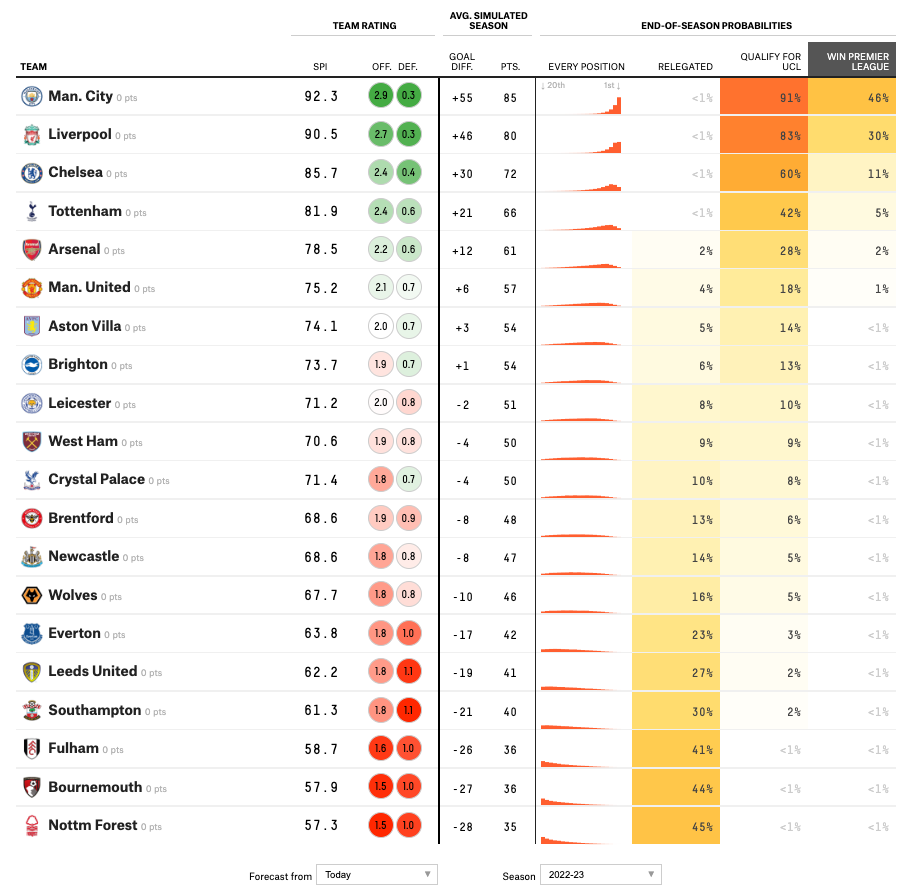

## Disclaimers on Limitations

### The Poisson Distribution

Using the Poisson distribution to predict matches will not be 100% accurate, and using this simplified version will definitely not be accurate either. It seems using the Poisson distribution will always produce the most likely event based on percentage, but sometimes those percentages are too close to call. For example, how would you pick a match where both teams had a 33% chance of winning? In our case, how would you predict the scoreline if the expected goals were 0.95 to 1.05? It could be 1-1, or it could be 1-0 to either team.

You could see this reflected in the final tables. While Fulham have a good chance of finishing last, I think they will win at least one match this season. The worst performing Premier League team ever was Derby County, who managed just one win and 11 points. I think both Fulham and Nottingham Forest will do better than that.

### The Data

Compiling the correct data to use for my predictions was also a tricky task, especially for the teams with new managers. Using Arsenal match data for matches where Mikel Arteta was in charge might be accurate, but using Manchester United match data under a previous manager probably won't be as accurate. 

Determining the best data to use for a Poisson distribution is tough to determine as well. 
- Older data may not be relevant enough for making predictions, so you don't want to use too much data. For example, using Nottingham Forest's match results from the 1998-99 season will probably be less relevant than using Crystal Palace's match results from the 2021-22 season.
- On the other hand, using less data usually results in less accurate predictions. For example, while the Leeds United match results data with Jesse Marsch as manager might be relevant, there may not be enough data to make an accurate prediction for them.

This calculation is also pretty simple because it only looks at two metrics: goals scored and goals conceded (or is that just one metric). There are plenty of other metrics that soccer analysts use to predict scorelines, such as shots, shots on target, team possession, key passes, etc.

### The Teams

Understanding how the teams play is very important, and using only the scoreline misses out on all the complexities of the game. As a simple example, should Liverpool's 2020-21 match data be included? It might be relevant since it was only a few campaigns ago, but they played most of that season without one of the best defenders in the world, Virgil van Dijk. Additionally, how will we know how the new managers perform at their new clubs, such as Erik ten Hag at Manchester United. Will his success from Ajax carry over to the Premier League? What kind of data should we use: the data from Ajax whose manager at the time is now manager of Manchester United? Or Manchester United's recent match data, since most of those players still play for the team?

## Conclusion

Despite some limitations, I still think this was a fun, and possibly useful, data analysis project. While my results might look funny to other soccer experts, soccer can be very unpredictable at times (remember Leicester City winning the league with 1000 to 1 odds?). And yet at the same time, sometimes data can be used to make accurate predictions. After all, the sports betting industry is worth billions of dollars, and the bookmakers have their own methodologies that are usually successful. Or you could just hire a [psychic octopus](https://en.wikipedia.org/wiki/Paul_the_Octopus) to make your predictions.

Just for kicks, I entered the team rankings from final standings average table into a Premier League prediction competition hosted by FotMob. Wish me luck! \*I think I'll need it\*

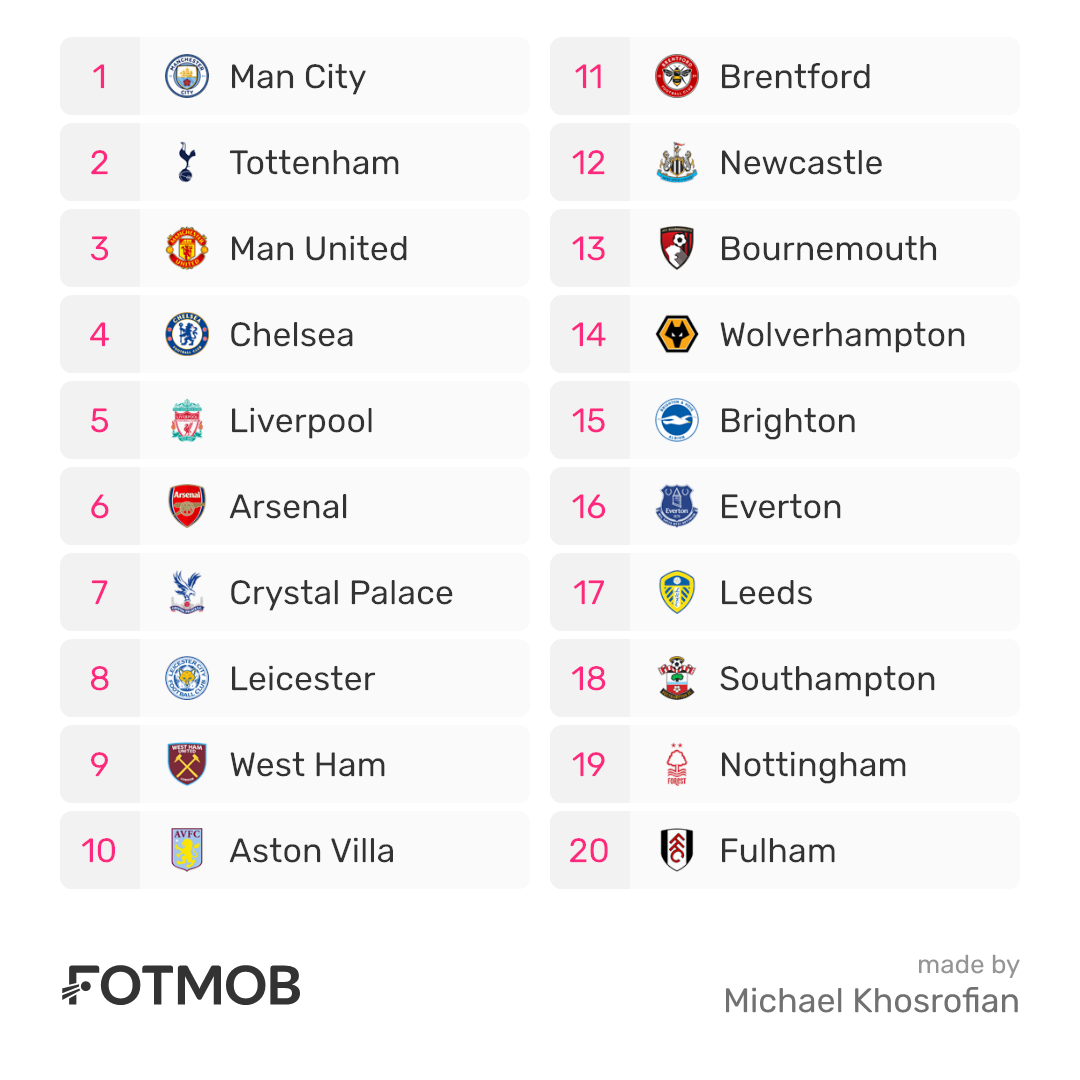